In [3]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import json
import os
from datetime import timedelta
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials
from matplotlib.ticker import ScalarFormatter

In [1]:
!pip install streamlit

  Using cached streamlit-1.38.0-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached altair-5.4.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached protobuf-5.28.0-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached pyarrow-17.0.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached watchdog-4.0.2-py3-none-win_amd64.whl.metadata (38 kB)
  Using cached narwhals-1.6.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.met

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.23.0 requires typing_extensions~=4.9.0, but you have typing-extensions 4.12.2 which is incompatible.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Load the JSON file
with open('mpd.slice.999000-999999.json') as f:
    data = json.load(f)

# Normalize the JSON structure into a flat table
df = pd.json_normalize(data)

# Convert the DataFrame to a CSV file
df.to_csv('data.csv', index=False)

print("JSON file has been converted to CSV successfully!")


JSON file has been converted to CSV successfully!


In [7]:
data['info']

{'generated_on': '2017-12-04 03:05:11.774401',
 'slice': '999000-999999',
 'version': 'v1'}

In [9]:
df = pd.DataFrame(data['playlists'])
df.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Study,false,999000,1468800000,28,18,1,"[{'pos': 0, 'artist_name': 'Yiruma', 'track_ur...",8,6123982,17,NaN
1,Megan,false,999001,1467504000,14,14,2,"[{'pos': 0, 'artist_name': 'The Dustbowl Reviv...",10,3228295,14,NaN
2,tbd,false,999002,1473984000,64,53,1,"[{'pos': 0, 'artist_name': 'Broods', 'track_ur...",9,14078091,45,NaN
3,Writing Playlist,false,999003,1450137600,188,115,1,"[{'pos': 0, 'artist_name': 'Talib Kweli', 'tra...",33,48872622,84,NaN
4,Drinking music,false,999004,1440633600,71,63,2,"[{'pos': 0, 'artist_name': 'Baauer', 'track_ur...",12,16090888,45,NaN


##Collect Data

In [3]:
import pandas as pd
import json
import os

# Directory where your JSON files are located
directory = r'C:\Users\user\Desktop\Spotify_Analysis\data'

# List all files in the directory with a .json extension
json_files = [file for file in os.listdir(directory) if file.endswith('.json')]
# print(json_files)

track_rows = []

# Loop through all JSON files
for file in json_files:
    try:
        # Use the full path to the JSON file
        file_path = os.path.join(directory, file)
        
        # Open and load the JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)
            playlists = data.get('playlists', [])
            
            # Process each playlist and its tracks
            for playlist in playlists:
                for track in playlist.get("tracks", []):
                    track_row = {
                        "playlist_name": playlist.get("name", ""),
                        "collaborative": playlist.get("collaborative", False),
                        "pid": playlist.get("pid", 0),
                        "modified_at": playlist.get("modified_at", 0),
                        "num_tracks": playlist.get("num_tracks", 0),
                        "num_albums": playlist.get("num_albums", 0),
                        "num_followers": playlist.get("num_followers", 0),
                        "num_edits": playlist.get("num_edits", 0),
                        "duration_ms_playlist": playlist.get("duration_ms", 0),
                        "num_artists": playlist.get("num_artists", 0),
                        "description": playlist.get("description", ""),
                        "track_pos": track.get("pos", 0),
                        "artist_name": track.get("artist_name", ""),
                        "track_uri": track.get("track_uri", ""),
                        "artist_uri": track.get("artist_uri", ""),
                        "track_name": track.get("track_name", ""),
                        "album_uri": track.get("album_uri", ""),
                        "duration_ms_track": track.get("duration_ms", 0),
                        "album_name": track.get("album_name", "")
                    }
                    track_rows.append(track_row)
    
    except (json.JSONDecodeError, IOError) as e:
        print(f"Error processing file {file}: {e}")

# Create a DataFrame from the collected track rows
df = pd.DataFrame(track_rows)

# Save the DataFrame to a CSV file
csv_file = 'Spotify_data.csv'
df.to_csv(csv_file, index=False)

print(f"CSV file has been created successfully: {csv_file}")


CSV file has been created successfully: Spotify_data.csv


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012554 entries, 0 to 4012553
Data columns (total 19 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   playlist_name         object
 1   collaborative         object
 2   pid                   int64 
 3   modified_at           int64 
 4   num_tracks            int64 
 5   num_albums            int64 
 6   num_followers         int64 
 7   num_edits             int64 
 8   duration_ms_playlist  int64 
 9   num_artists           int64 
 10  description           object
 11  track_pos             int64 
 12  artist_name           object
 13  track_uri             object
 14  artist_uri            object
 15  track_name            object
 16  album_uri             object
 17  duration_ms_track     int64 
 18  album_name            object
dtypes: int64(10), object(9)
memory usage: 581.7+ MB


In [2]:
df = pd.read_csv('Spotify_data.csv')
df.head()

,playlist_name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms_playlist,num_artists,description,track_pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_track,album_name
0,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


In [6]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

missing_values

playlist_name                73
collaborative                 0
pid                           0
modified_at                   0
num_tracks                    0
num_albums                    0
num_followers                 0
num_edits                     0
duration_ms_playlist          0
num_artists                   0
description             3934760
track_pos                     0
artist_name                   0
track_uri                     0
artist_uri                    0
track_name                   13
album_uri                     0
duration_ms_track             0
album_name                    1
dtype: int64

In [7]:
# drop the description column becouse it has many missing values
df.drop(columns=['description'], inplace=True)

# drop the rows that have missing value in the playlist coulmn
df.dropna(subset=['playlist_name'], inplace=True)

# drop the rows that have missing value in the track_name coulmn
df.dropna(subset=['track_name'], inplace=True)

# drop the rows that have missing value in the album_name coulmn
df.dropna(subset=['album_name'], inplace=True)

# check for missing values in the DataFrame again
missing_values = df.isnull().sum()
missing_values

playlist_name           0
collaborative           0
pid                     0
modified_at             0
num_tracks              0
num_albums              0
num_followers           0
num_edits               0
duration_ms_playlist    0
num_artists             0
track_pos               0
artist_name             0
track_uri               0
artist_uri              0
track_name              0
album_uri               0
duration_ms_track       0
album_name              0
dtype: int64

In [8]:
df.shape

(4012467, 18)

In [9]:
# Find all duplicates including first occurrences
duplicates_including_first = df[df.duplicated(keep=False)]

print(duplicates_including_first)


Empty DataFrame
Columns: [playlist_name, collaborative, pid, modified_at, num_tracks, num_albums, num_followers, num_edits, duration_ms_playlist, num_artists, track_pos, artist_name, track_uri, artist_uri, track_name, album_uri, duration_ms_track, album_name]
Index: []


In [12]:
df=df.drop_duplicates(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959349 entries, 0 to 3959348
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   song_name        object
 1   song_time        object
 2   artist           object
 3   album            object
 4   playlist_ID      int64 
 5   playlist_name    object
 6   playlist_length  object
 7   num_followers    int64 
 8   num_artists      int64 
 9   num_edits        int64 
 10  collaborative    bool  
 11  num_albums       int64 
 12  num_tracks       int64 
 13  modified_at      object
 14  song_artist      object
dtypes: bool(1), int64(6), object(8)
memory usage: 426.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959349 entries, 0 to 3959348
Data columns (total 14 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   pid                int64 
 1   collaborative      bool  
 2   playlist_name      object
 3   modified_at        object
 4   duration_playlist  object
 5   num_followers      int64 
 6   num_artists        int64 
 7   num_edits          int64 
 8   num_albums         int64 
 9   num_tracks         int64 
 10  track_name         object
 11  duration_track     object
 12  artist_name        object
 13  album_name         object
dtypes: bool(1), int64(6), object(7)
memory usage: 396.5+ MB


<Axes: >

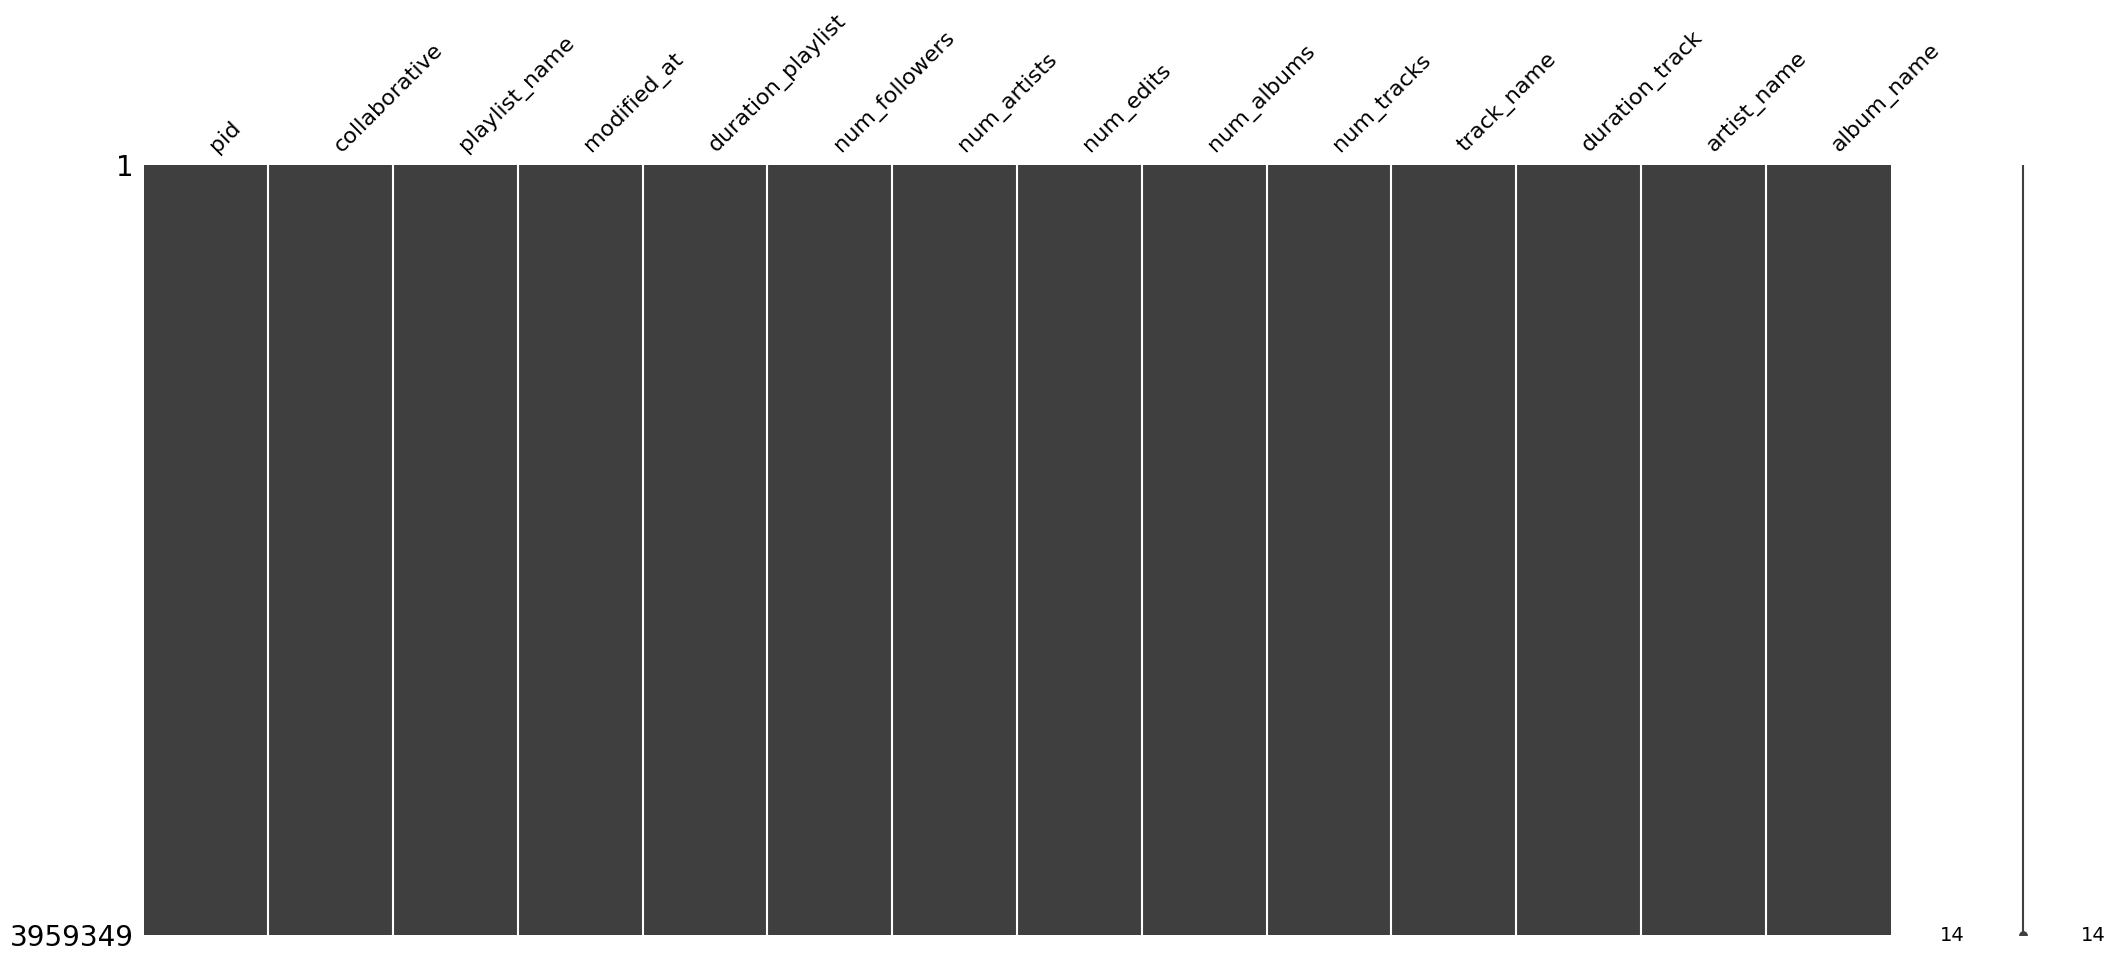

In [28]:
df.info()
# Visualize missing values
msno.matrix(df)

In [5]:
# Convert the 'modified_at' column from Unix timestamp to datetime
df['modified_at'] = pd.to_datetime(df['modified_at'], unit='s')



In [4]:
df.head()

,playlist_name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms_playlist,num_artists,track_pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_track,album_name
0,Throwbacks,False,0,2017-04-29,52,47,1,6,11532414,37,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,Throwbacks,False,0,2017-04-29,52,47,1,6,11532414,37,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,Throwbacks,False,0,2017-04-29,52,47,1,6,11532414,37,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,Throwbacks,False,0,2017-04-29,52,47,1,6,11532414,37,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,Throwbacks,False,0,2017-04-29,52,47,1,6,11532414,37,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


In [6]:
import datetime

def ms_to_time(ms):
    time_delta = datetime.timedelta(milliseconds=ms)
    time_str = str(time_delta)
    return time_str.split(".")[0]

# Update the 'duration_ms_track' column with the converted values
df['duration_ms_track'] = df['duration_ms_track'].apply(ms_to_time)
df.rename(columns={'duration_ms_track' : 'duration_track'}, inplace=True)
df.head()

,playlist_name,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_hms_playlist,num_artists,track_pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_track,album_name
0,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0:03:46,The Cookbook
1,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,0:03:18,In The Zone
2,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,0:03:55,Dangerously In Love (Alben für die Ewigkeit)
3,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,0:04:27,Justified
4,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,0:03:47,Hot Shot


In [6]:
# Function to convert milliseconds to hours:minutes:seconds
def convert_ms_to_hms(ms):
    
    time_in_seconds = ms // 1000
    seconds = time_in_seconds % 60
    minutes = time_in_seconds // 60
    hours = minutes // 60
    minutes = minutes % 60
    days = hours // 24
    hours = hours % 24

    time = timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)
    return str(time)


# Update the 'duration_ms_playlist' column with the converted values
df['duration_ms_playlist'] = df['duration_ms_playlist'].apply(convert_ms_to_hms)

# Rename the 'duration_ms_playlist' column to 'duration_hms_playlist'
df.rename(columns={'duration_ms_playlist': 'duration_playlist'}, inplace=True)


df.head()

,playlist_name,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_hms_playlist,num_artists,track_pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_track,album_name
0,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0:03:46,The Cookbook
1,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,0:03:18,In The Zone
2,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,0:03:55,Dangerously In Love (Alben für die Ewigkeit)
3,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,0:04:27,Justified
4,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,0:03:47,Hot Shot


In [ ]:
import requests
from datetime import datetime, timedelta
from flask import Flask, redirect, request, jsonify, session
import urllib.parse

app = Flask(__name__)
app.secret_key = '53d355f8-571a-4590-a310-1f9579440851'

CLIENT_ID = 'bcb4f26e926140789b4d3f519107752f'
CLIENT_SECRET = '24d79519d59842df9043a4833819c803'
REDIRECT_URI = 'http://localhost:5000/callback'
AUTH_URL = 'https://accounts.spotify.com/authorize'
TOKEN_URL = 'https://accounts.spotify.com/api/token'
API_BASE_URL = 'https://api.spotify.com/v1/'

@app.route('/')
def index():
    return "Welcome to my Spotify App <a herf='/login'>Login with Spotify</a>"

@app.route('/login')
def login():
    scope = 'user-read-private user-read-email'

    params = {
        'client_id': CLIENT_ID,
        'response_type': 'code',
        'scope': scope,
        'redirect_uri': REDIRECT_URI,
        'show_dialog': True
    }
    auth_url = f"{AUTH_URL}?{urllib.parse.urlencode(params)}"
    return redirect(auth_url)

@app.route('/callback')
def callback():
    if 'error' in request.args:
        return jsonify({'error': request.args['error']})
    
    if 'code' in request.args:
        req_body = {
            'code': request.args['code'],
            'grant_type': 'authorization_code',
            'redirect_uri': REDIRECT_URI,
            'client_id': CLIENT_ID,
            'client_secret': CLIENT_SECRET
        }

        response = requests.post(TOKEN_URL, data=req_body)
        token_info = response.json()

        session['access_token'] = token_info['access_token']
        session['refresh_token'] = token_info['refresh_token']
        session['expires_at'] = datetime.now().timestamp() + token_info['expires_in']

        return redirect('/playlists')
    
@app.route('/playlists')
def playlists():
    if 'access_token' not in session:
        return redirect('/login')
    if datetime.now().timestamp() > session['expires_at']:
        return redirect('/refresh-token')
    
    headers = {
        'Authorization': f'Bearer {session["access_token"]}'
    }

    response = requests.get(API_BASE_URL + 'me/playlists', headers=headers)
    playlists = response.json()

    return jsonify(playlists)

@app.route('/refresh-token')
def refresh_token():
    if 'access_token' not in session:
        return redirect('/login')
    if datetime.now().timestamp() > session['expires_at']:
        req_body = {
            'grant_type':'refresh_token',
            'refresh_token': session['refresh_token'],
            'client_id': CLIENT_ID,
            'client_secret': CLIENT_SECRET
            }
        response = requests.post(TOKEN_URL, data=req_body)
        new_token_info = response.json()
        session['access_token'] = new_token_info['access_token']
        session['expires_at'] = datetime.now().timestamp() + new_token_info['expires_in']
        # session['refresh_token'] = new_token_info['refresh_token']

        return redirect('/playlists')
    
if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True)


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# Set up your credentials
client_id = 'bcb4f26e926140789b4d3f519107752f'
client_secret = '24d79519d59842df9043a4833819c803'

# Authenticate
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Fetch track, artist, and album details
artist_info = sp.artist('spotify:artist:2wVse2owCIT7go1WT98tk')
print(artist_info)
album_info = sp.album('spotify:album:6vV5UrXcfyQD1wu4Qo2I9K')
print(album_info)
track_info = sp.track('spotify:track:6rqhFgbbKwnb9MLmUQDhG6')
print(track_info)


In [18]:
new_order = ['pid','collaborative',	'playlist_name',	'modified_at',	'duration_playlist',	'num_followers',	'num_artists',	'num_edits',	'num_albums',	'num_tracks',	'track_name',	'duration_track',	'artist_name',	'album_name']
df = df[new_order]

In [27]:
df.head()

,pid,collaborative,playlist_name,modified_at,duration_playlist,num_followers,num_artists,num_edits,num_albums,num_tracks,track_name,duration_track,artist_name,album_name
0,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Lose Control (feat. Ciara & Fat Man Scoop),00:03:46,Missy Elliott,The Cookbook
1,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Toxic,00:03:18,Britney Spears,In The Zone
2,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Crazy In Love,00:03:55,Beyoncé,Dangerously In Love (Alben für die Ewigkeit)
3,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Rock Your Body,00:04:27,Justin Timberlake,Justified
4,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,It Wasn't Me,00:03:47,Shaggy,Hot Shot


In [5]:
# Save the updated DataFrame back to the same CSV file
df.to_csv('final_cleaned_version.csv', index=False)

In [183]:
df = pd.read_csv('final_cleaned_version.csv')
df.head()

,pid,collaborative,playlist_name,modified_at,duration_playlist,num_followers,num_artists,num_edits,num_albums,num_tracks,track_name,duration_track,artist_name,album_name
0,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Lose Control (feat. Ciara & Fat Man Scoop),00:03:46,Missy Elliott,The Cookbook
1,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Toxic,00:03:18,Britney Spears,In The Zone
2,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Crazy In Love,00:03:55,Beyoncé,Dangerously In Love (Alben für die Ewigkeit)
3,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Rock Your Body,00:04:27,Justin Timberlake,Justified
4,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,It Wasn't Me,00:03:47,Shaggy,Hot Shot


In [4]:
df.head()

,pid,collaborative,playlist_name,modified_at,duration_playlist,num_followers,num_artists,num_edits,num_albums,num_tracks,track_name,duration_track,artist_name,album_name
0,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Lose Control (feat. Ciara & Fat Man Scoop),00:03:46,Missy Elliott,The Cookbook
1,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Toxic,00:03:18,Britney Spears,In The Zone
2,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Crazy In Love,00:03:55,Beyoncé,Dangerously In Love (Alben für die Ewigkeit)
3,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Rock Your Body,00:04:27,Justin Timberlake,Justified
4,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,It Wasn't Me,00:03:47,Shaggy,Hot Shot


In [21]:
df.describe()

,pid,num_followers,num_artists,num_edits,num_albums,num_tracks
count,3.959349e+06,3.959349e+06,3.959349e+06,3.959349e+06,3.959349e+06,3.959349e+06
mean,3.001906e+04,3.306546e+00,5.814182e+01,2.805415e+01,7.881145e+01,1.099419e+02
std,1.731896e+04,1.102643e+02,3.691184e+01,2.831284e+01,4.807357e+01,6.299725e+01
min,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
25%,1.506500e+04,1.000000e+00,3.000000e+01,7.000000e+00,4.000000e+01,5.700000e+01
50%,2.998400e+04,1.000000e+00,5.100000e+01,1.800000e+01,7.000000e+01,1.000000e+02
75%,4.500800e+04,2.000000e+00,8.000000e+01,4.000000e+01,1.110000e+02,1.570000e+02
max,6.000100e+04,1.584200e+04,2.120000e+02,1.850000e+02,2.420000e+02,2.500000e+02


In [22]:
##Data Analysis

In [48]:
#   the top 10 the most popular artists
top_artists = df['artist_name'].value_counts().head(10)
# Print the top 10 most popular artists
print(f'The top 10 most popular artists:\n{top_artists}')
# another way:
# top_artists = df.groupby('artist_name')['track_name'].count().sort_values(ascending=False).head(10)
# top_artists


The top 10 most popular artists:
artist_name
Drake             48447
Kanye West        24300
Kendrick Lamar    20060
Rihanna           19550
The Weeknd        18001
Eminem            16554
Ed Sheeran        16270
Future            14931
J. Cole           14205
Beyoncé           13959
Name: count, dtype: int64


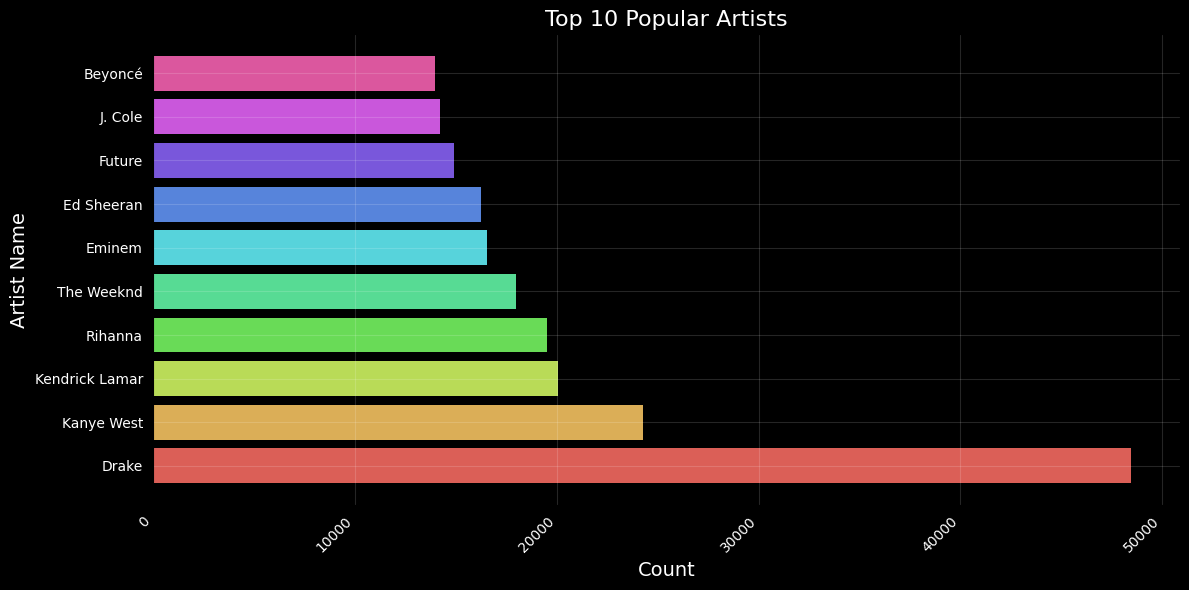

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# top_artists is a Series with artist names as index and counts as values
top_artists = df['artist_name'].value_counts().head(10)

# Convert to DataFrame for plotting
top_artists_df = top_artists.reset_index()
top_artists_df.columns = ['artist_name', 'count']

# Use Seaborn color palette
colors = sns.color_palette("hls", 10)[:10]  # Use the first 5 colors

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_artists_df['artist_name'], top_artists_df['count'], color=colors)
plt.xlabel('Count', fontsize=14, color='white')
plt.ylabel('Artist Name', fontsize=14, color='white')
plt.title('Top 10 Popular Artists', fontsize=16, color='white')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')

# Set background color to black
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')
plt.grid(True, linestyle='solid', alpha=0.15, color='white')
plt.tight_layout()

plt.show()


In [52]:
#   the top 10 most popular Tracks
top_tracks = df['track_name'].value_counts().head(10)

# Print the top 10 most popular Tracks
print(f'The Top 10 Most Popular Tracks:\n {top_tracks}')


The Top 10 Most Popular Tracks:
 track_name
Closer                         4027
Home                           2977
Roses                          2676
HUMBLE.                        2627
One Dance                      2482
Congratulations                2402
Ride                           2379
Broccoli (feat. Lil Yachty)    2365
Let Me Love You                2258
Caroline                       2199
Name: count, dtype: int64


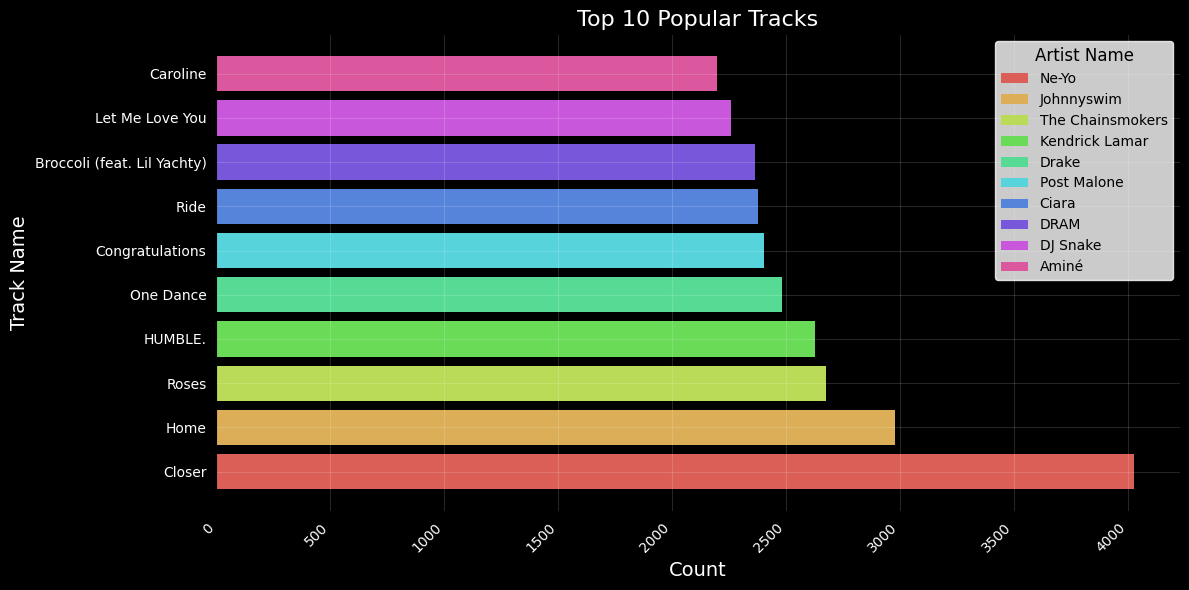

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame, replace this with your actual data
# Get the top 10 most frequent tracks
top_tracks = df['track_name'].value_counts().head(10)

# Create a DataFrame to include the track names and their respective counts
top_tracks_df = top_tracks.reset_index()
top_tracks_df.columns = ['track_name', 'count']

# Create a dictionary to map tracks to their respective artists
# Replace 'artist_name' and 'track_name' with the actual column names from your DataFrame
track_to_artist = df.groupby('track_name')['artist_name'].first().to_dict()

# Map artist names to the top tracks
top_tracks_df['artist_name'] = top_tracks_df['track_name'].map(track_to_artist)

# Use Seaborn color palette
colors = sns.color_palette("hls", 10)[:10]  # Use the first 10 colors

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(top_tracks_df['track_name'], top_tracks_df['count'], color=colors)

plt.xlabel('Count', fontsize=14, color='white')
plt.ylabel('Track Name', fontsize=14, color='white')
plt.title('Top 10 Popular Tracks', fontsize=16, color='white')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')

# Add a legend showing artist names for each track
for bar, artist in zip(bars, top_tracks_df['artist_name']):
    bar.set_label(artist)

plt.legend(title="Artist Name", loc='best', fontsize=10, title_fontsize=12, facecolor='white', edgecolor='white')

# Set background color to black
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')
plt.grid(True, linestyle='solid', alpha=0.15, color='white')
plt.tight_layout()

plt.show()


        year                                         track_name  num_followers
0       2010  (Everybody's Got to Learn Sometime) I Need You...              1
1829    2011                               Topei Quero Ver Cair            822
13649   2012                                        Some Nights           2817
52161   2013                                               Home            633
161285  2014                                               Home            980
413410  2015                                           Your Man          11478
489807  2016                                            Goodbye          30438
786406  2017                                            HUMBLE.          28333


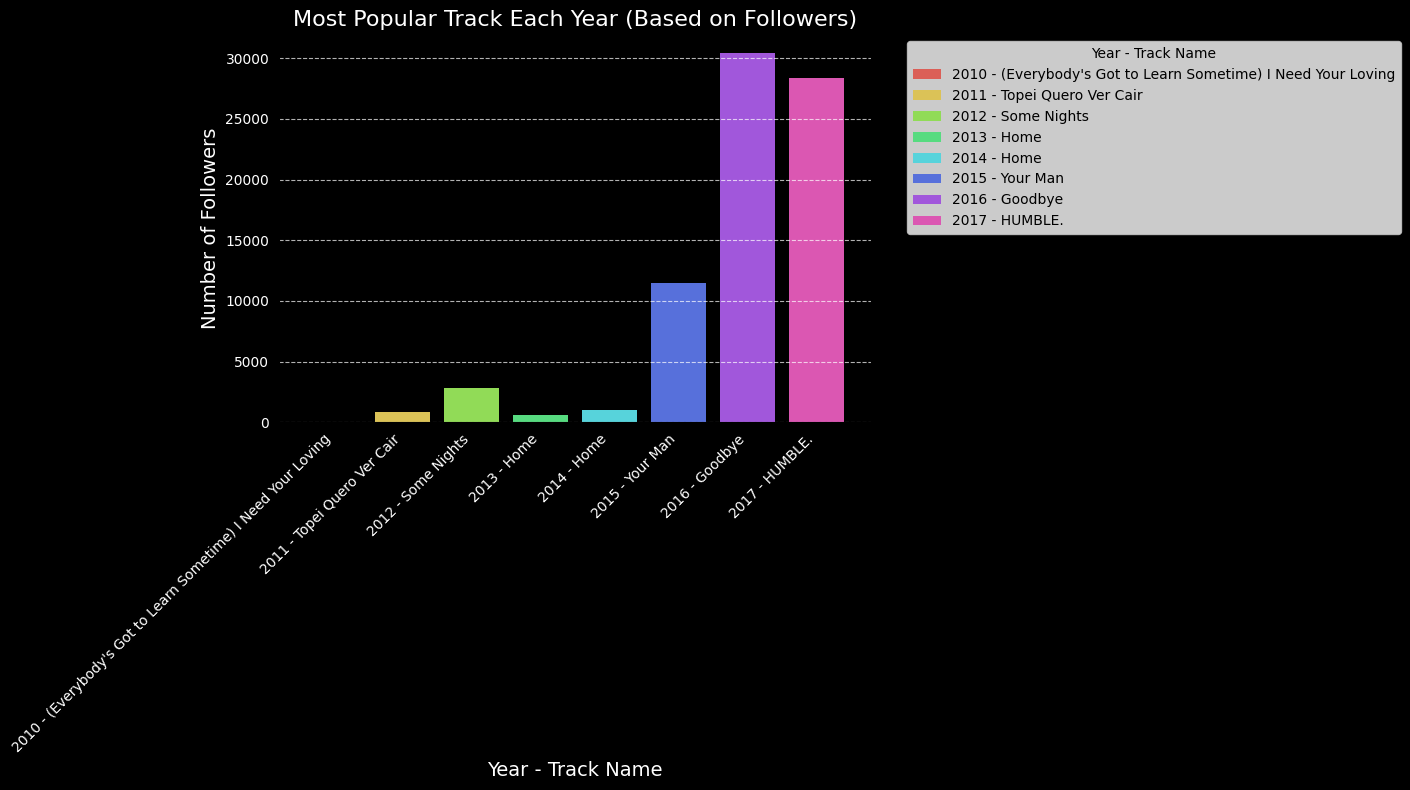

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Ensure the 'modified_at' column is of datetime type
# df['modified_at'] = pd.to_datetime(df['modified_at'])

# # Extract the year from the 'modified_at' column
# df['year'] = df['modified_at'].dt.year

# Group by year and track name, then sum the number of followers for each track
tracks_per_year = df.groupby(['year', 'track_name'])['num_followers'].sum().reset_index()

# Find the most popular track for each year based on the highest number of followers
top_tracks_per_year = tracks_per_year.loc[tracks_per_year.groupby('year')['num_followers'].idxmax()]


# Display the results
print(top_tracks_per_year)

# Define a color palette from seaborn
palette = sns.color_palette("hls", len(top_tracks_per_year))

# Create a bar chart to show the most popular track for each year based on followers
plt.figure(figsize=(14, 8))

bars = plt.bar(
    top_tracks_per_year['year'].astype(str) + ' - ' + top_tracks_per_year['track_name'], 
    top_tracks_per_year['num_followers'], 
    color=palette
)

# Add a legend
plt.legend(
    handles=bars,
    labels=[f"{year} - {track}" for year, track in zip(top_tracks_per_year['year'], top_tracks_per_year['track_name'])],
    title="Year - Track Name",
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

plt.xlabel('Year - Track Name', fontsize=14, color='white')
plt.ylabel('Number of Followers', fontsize=14, color='white')
plt.title('Most Popular Track Each Year (Based on Followers)', fontsize=16, color='white')

# Set background color to black
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')

# Customize ticks and grid
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')



# Display the plot
plt.tight_layout()
plt.show()


In [6]:
# create new column in dataframe song_name = ("track_name","artist_name")

df['track_artist'] = '('+ df['track_name'] +'_'+ df['artist_name'] + ')'

df.head()

,pid,collaborative,playlist_name,modified_at,duration_playlist,num_followers,num_artists,num_edits,num_albums,num_tracks,track_name,duration_track,artist_name,album_name,track_artist
0,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Lose Control (feat. Ciara & Fat Man Scoop),00:03:46,Missy Elliott,The Cookbook,(Lose Control (feat. Ciara & Fat Man Scoop)_Mi...
1,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Toxic,00:03:18,Britney Spears,In The Zone,(Toxic_Britney Spears)
2,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Crazy In Love,00:03:55,Beyoncé,Dangerously In Love (Alben für die Ewigkeit),(Crazy In Love_Beyoncé)
3,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,Rock Your Body,00:04:27,Justin Timberlake,Justified,(Rock Your Body_Justin Timberlake)
4,0,False,Throwbacks,2017-04-29,03:12:12,1,37,6,47,52,It Wasn't Me,00:03:47,Shaggy,Hot Shot,(It Wasn't Me_Shaggy)


       year                                track_name        artist_name  \
1      2010               Because of You - Radio Edit    Scanty Sandwich   
548    2011                                Eres Tonto  El Canto Del Loco   
2749   2012                            All Night Long          Timbaland   
474    2011  Don't Know What You Got (Till It's Gone)         Cinderella   
758    2011                       Historia de un Amor      Los Tres Ases   
11468  2012                                    Murder            G. Corp   
29978  2013              Black - Mexico City 12/10/05          Pearl Jam   

       num_followers  
1                  1  
548                1  
2749               2  
474                1  
758                4  
11468              1  
29978              1  


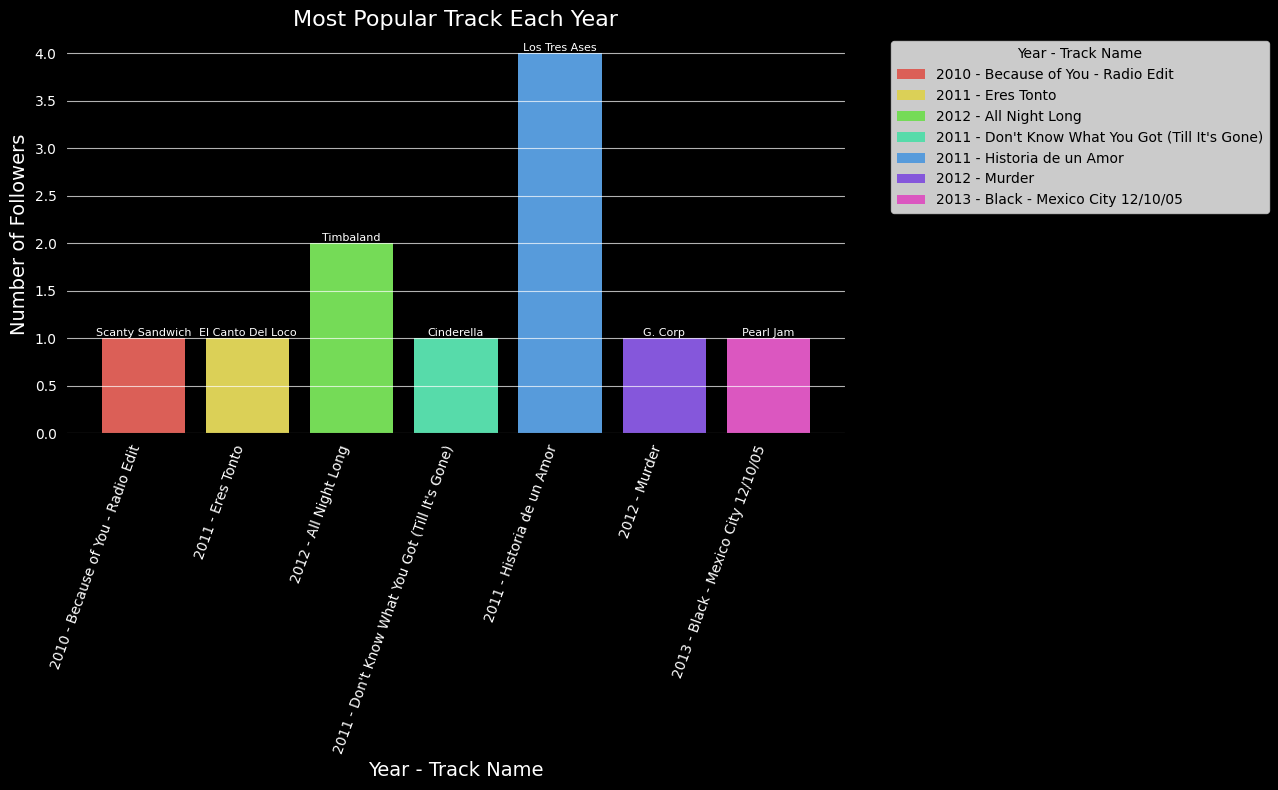

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'modified_at' column is of datetime type
# df['modified_at'] = pd.to_datetime(df['modified_at'])

# Extract the year from the 'modified_at' column
# df['year'] = df['modified_at'].dt.year

# Group by year, track name, and artist name, then sum the number of followers for each track
tracks_per_year = df.groupby(['year', 'track_name', 'artist_name'])['num_followers'].sum().reset_index()

# Find the most popular track for each year based on the highest number of followers
top_tracks_per_year = tracks_per_year.loc[tracks_per_year.groupby('year')['num_followers'].idxmax().head(5)]

# Display the results
print(top_tracks_per_year)

# Define a color palette from seaborn
palette = sns.color_palette("hls", len(top_tracks_per_year))

# Create a bar chart to show the most popular track for each year based on followers
plt.figure(figsize=(13, 8))

bars = plt.bar(
    top_tracks_per_year['year'].astype(str) + ' - ' + top_tracks_per_year['track_name'], 
    top_tracks_per_year['num_followers'], 
    color=palette
)

# Add a legend
plt.legend(
    handles=bars,
    labels=[f"{year} - {track}" for year, track in zip(top_tracks_per_year['year'], top_tracks_per_year['track_name'])],
    title="Year - Track Name",
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
    
)

# Add text above each bar with the artist name
for bar, artist in zip(bars, top_tracks_per_year['artist_name']):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, yval, artist, 
        ha='center', va='bottom', fontsize=8, color='white'
    )

plt.xlabel('Year - Track Name', fontsize=14, color='white')
plt.ylabel('Number of Followers', fontsize=14, color='white')
plt.title('Most Popular Track Each Year', fontsize=16, color='white')

# Set background color to black
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')

# Customize ticks and grid
plt.xticks(rotation=70, ha='right', color='white')
plt.yticks(color='white')
plt.grid(axis='y', linestyle='solid', alpha=0.7, color='white')

# Display the plot
plt.tight_layout()
plt.show()


         year                                          song_name  \
0        2010  (Everybody's Got to Learn Sometime) I Need You...   
47       2011       A Morte do Capoeira-Mestre Suassuna e Dirceu   
14605    2012                                   Some Nights-fun.   
30994    2013                         Blurred Lines-Robin Thicke   
212159   2014                                   Latch-Disclosure   
510638   2015                               Your Man-Josh Turner   
809354   2016  You And Your Friends (feat. Snoop Dogg & Ty Do...   
1007612  2017                             HUMBLE.-Kendrick Lamar   

         num_followers  
0                    1  
47                 548  
14605             2749  
30994              474  
212159             758  
510638           11468  
809354           29978  
1007612          28276  


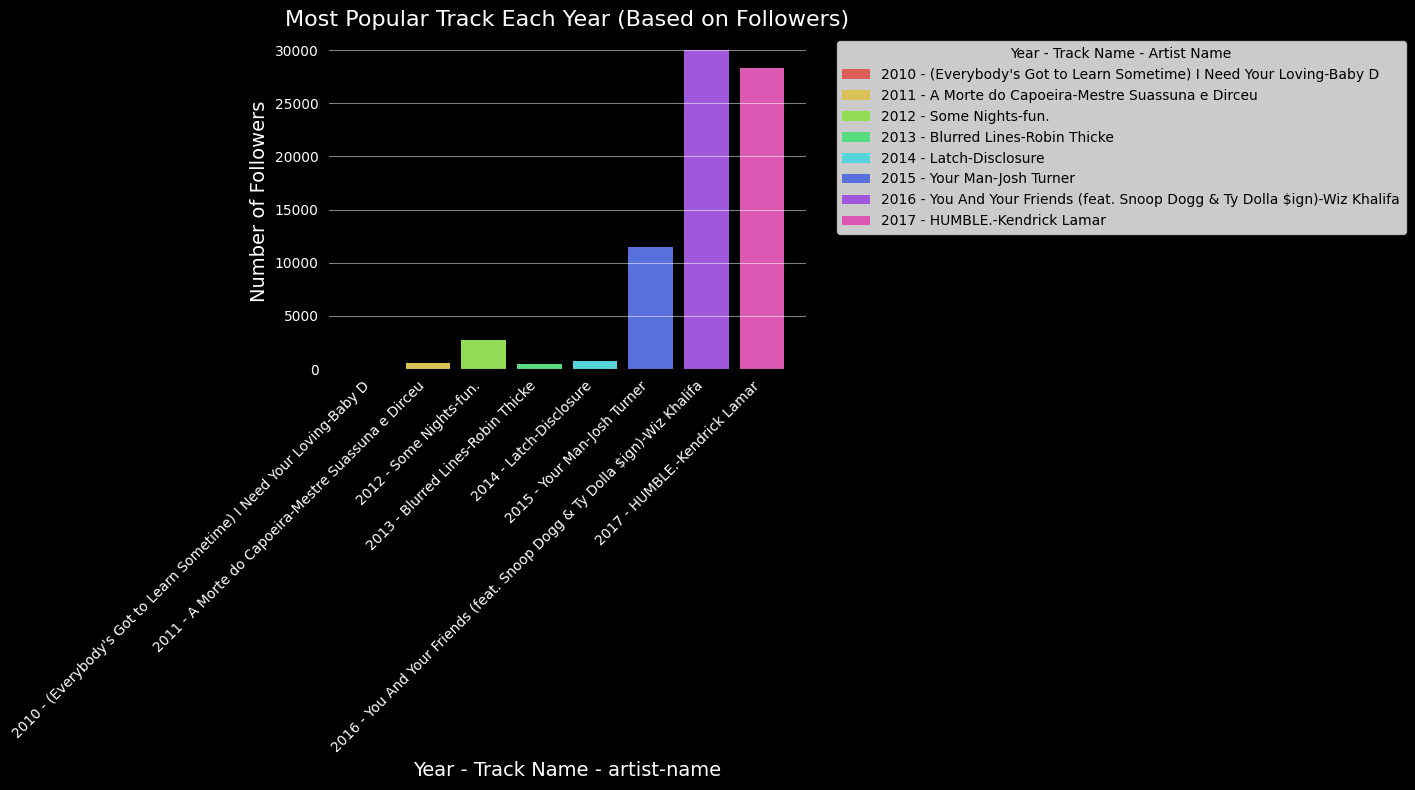

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'modified_at' column is of datetime type
# df['modified_at'] = pd.to_datetime(df['modified_at'])

# Extract the year from the 'modified_at' column
# df['year'] = df['modified_at'].dt.year

# Group by year, track name, and artist name, then sum the number of followers for each track
tracks_per_year = df.groupby(['year', 'song_name'])['num_followers'].sum().reset_index()

# Find the most popular track for each year based on the highest number of followers
top_tracks_per_year = tracks_per_year.loc[tracks_per_year.groupby('year')['num_followers'].idxmax()]

# Display the results
print(top_tracks_per_year)

# Define a color palette from seaborn
palette = sns.color_palette("hls", len(top_tracks_per_year))

# Create a bar chart to show the most popular track for each year based on followers
plt.figure(figsize=(14, 8))

bars = plt.bar(
    top_tracks_per_year['year'].astype(str) + ' - ' + top_tracks_per_year['song_name'], 
    top_tracks_per_year['num_followers'], 
    color=palette
)

# Add a legend
plt.legend(
    handles=bars,
    labels=[f"{year} - {track}" for year, track in zip(top_tracks_per_year['year'], top_tracks_per_year['song_name'])],
    title="Year - Track Name - Artist Name",
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

# Add text above each bar with the artist name
# for bar, artist in zip(bars, top_tracks_per_year['artist_name']):
#     yval = bar.get_height()
#     plt.text(
#         bar.get_x() + bar.get_width()/2, yval, artist, 
#         ha='center', va='bottom', fontsize=8, color='white'
#     )

plt.xlabel('Year - Track Name - artist-name', fontsize=14, color='white')
plt.ylabel('Number of Followers', fontsize=14, color='white')
plt.title('Most Popular Track Each Year (Based on Followers)', fontsize=16, color='white')

# Set background color to black
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')

# Customize ticks and grid
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.grid(axis='y', linestyle='solid', alpha=0.5, color='white')

# Display the plot
plt.tight_layout()
plt.show()


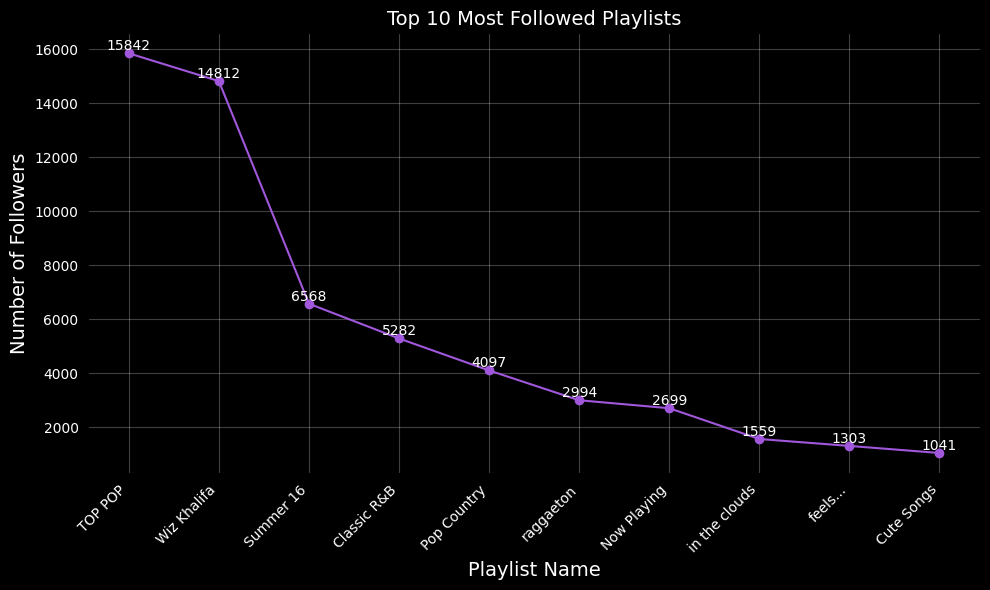

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'pid' and take the first occurrence for each unique playlist to get follower count
top_playlists = (
    df.groupby('pid')
    .first()  # Take the first row for each unique 'pid'
    .reset_index()  # Reset index to convert 'pid' from index to column
    .sort_values(by='num_followers', ascending=False)  # Sort by followers in descending order
    .head(10)  # Get top 10 playlists
)

# Extract the relevant playlist names for labeling
x_labels = top_playlists['playlist_name']
if any(top_playlists['playlist_name'].str.len() > 20):
    x_labels = top_playlists['pid']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_labels, top_playlists['num_followers'], marker='o', color='#a157db', linestyle='-')
plt.xlabel('Playlist Name', fontsize=14, color='white')
plt.ylabel('Number of Followers', fontsize=14, color='white')
plt.title('Top 10 Most Followed Playlists', fontsize=14, color='white')
plt.xticks(rotation=45, ha='right')

# Customize the ticks and background
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('#000000')  # Set plot background color
plt.gcf().set_facecolor('#000000')  # Set figure background color
plt.grid(True, linestyle='solid', alpha=0.25, color='white')


# Annotate the total number of followers on each point
for i, (label, followers) in enumerate(zip(x_labels, top_playlists['num_followers'])):
    plt.annotate(
        followers,
        (i, followers),
        color='white',
        horizontalalignment='center',
        verticalalignment='bottom'
    )

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_25644\5195874.py:48: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


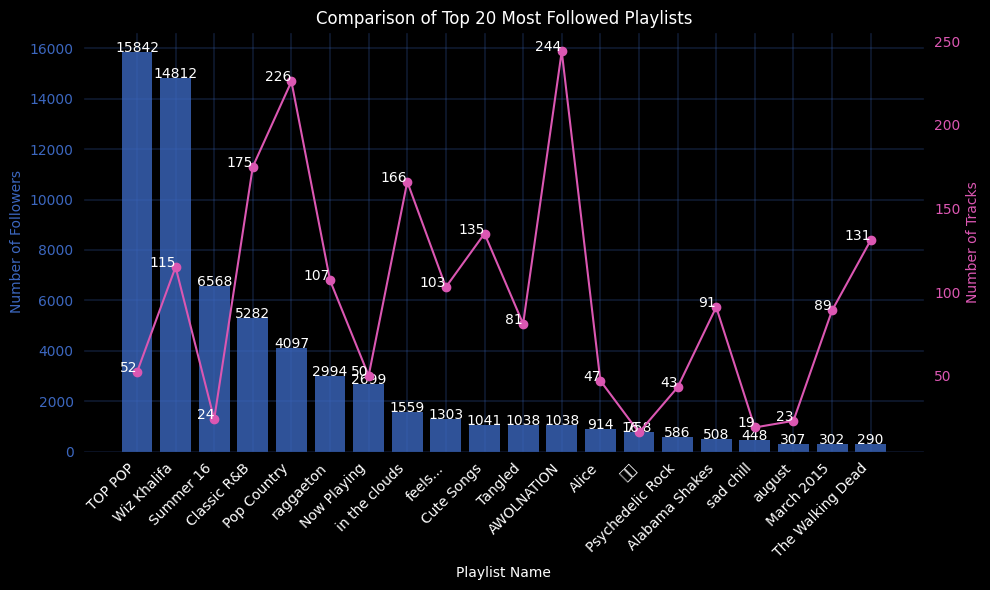

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Get the top 10 most followed playlists
top_10_playlists = (
    df.groupby('pid')
    .first()  # Take the first row for each unique 'pid'
    .reset_index()  # Reset index to convert 'pid' from index to column
    .sort_values(by='num_followers', ascending=False)  # Sort by followers in descending order
    .head(20)  # Get top 10 playlists
)

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))  # Increase the figure size


# Set figure and axes background color to black
plt.gcf().set_facecolor('#000000')  # Set figure background color to black
ax1.set_facecolor('#000000')  # Set axes background color to black

# Plotting the number of followers
ax1.set_xlabel('Playlist Name', color='white')
ax1.set_ylabel('Number of Followers', color='#3c67bf')
ax1.bar(top_10_playlists['playlist_name'], top_10_playlists['num_followers'], color='#3c67bf', alpha=0.8, label='Number of Followers')
ax1.tick_params(axis='y', labelcolor='#3c67bf')

# Customize the ticks
plt.xticks(rotation=45, ha='right', color='white')

# Create a second y-axis to plot the number of tracks
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Tracks', color='#db57b2')
ax2.plot(top_10_playlists['playlist_name'], top_10_playlists['num_tracks'], marker='o', color='#db57b2', label='Number of Tracks')
ax2.tick_params(axis='y', labelcolor='#db57b2')

# Adding title and grid
plt.title('Comparison of Top 20 Most Followed Playlists', color='white')
ax1.grid(color='#3c67bf', linestyle='solid', linewidth=0.3)

# Show values on bars
for i in range(len(top_10_playlists)):
    ax1.text(i, top_10_playlists['num_followers'].iloc[i], str(top_10_playlists['num_followers'].iloc[i]), color='white', fontsize=10, ha='center')
    ax2.text(i, top_10_playlists['num_tracks'].iloc[i], str(top_10_playlists['num_tracks'].iloc[i]), color='white', fontsize=10, ha='right')


# Show the plot
plt.tight_layout()
plt.show()

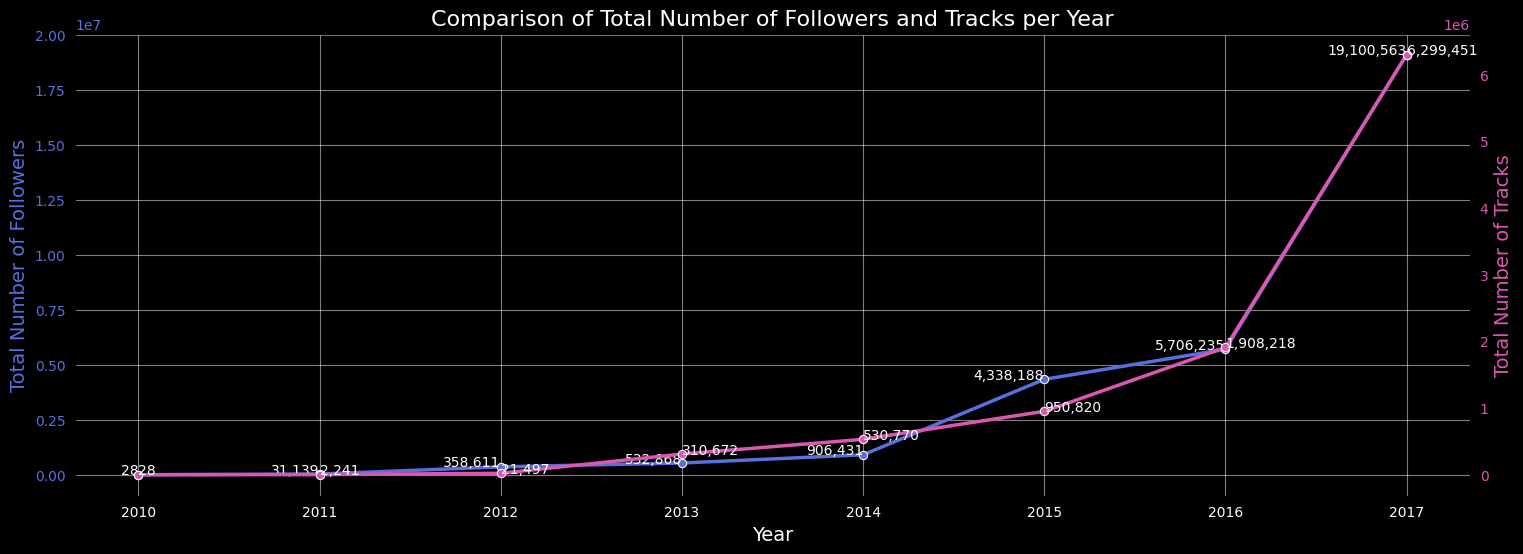

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'modified_at' column is of datetime type
df['modified_at'] = pd.to_datetime(df['modified_at'])

# Extract the year from the 'modified_at' column
df['year'] = df['modified_at'].dt.year

# Group by year and calculate the total number of followers and tracks
yearly_data = df.groupby('year').agg({'num_followers': 'sum', 'track_name': 'count'}).reset_index()
yearly_data.rename(columns={'track_name': 'num_tracks'}, inplace=True)

# Set up the figure dimensions
fig, ax1 = plt.subplots(figsize=(18, 6))
# Customize the x-axis
plt.xticks(yearly_data['year'], rotation=45, color='white')

# Plot the total number of followers (primary y-axis)
sns.lineplot(data=yearly_data, x='year', y='num_followers', marker='o', color='#5770db', linewidth=2.5, ax=ax1)
ax1.set_ylabel('Total Number of Followers', fontsize=14, color='#5770db')
ax1.tick_params(axis='y', labelcolor='#5770db')
ax1.set_xlabel('Year', fontsize=14, color='white')


# Set up the secondary y-axis for the total number of tracks
ax2 = ax1.twinx()
sns.lineplot(data=yearly_data, x='year', y='num_tracks', marker='o', color='#db57b2', linewidth=2.5, ax=ax2)
ax2.set_ylabel('Total Number of Tracks', fontsize=14, color='#db57b2')
ax2.tick_params(axis='y', labelcolor='#db57b2')

# Annotate the total number of followers and total number of tracks on each point
for i in range(yearly_data.shape[0]):
    ax1.text(yearly_data['year'][i], yearly_data['num_followers'][i], 
             f"{yearly_data['num_followers'][i]:,}", 
             horizontalalignment='right', fontsize=10, color='white')
    ax2.text(yearly_data['year'][i], yearly_data['num_tracks'][i], 
             f"{yearly_data['num_tracks'][i]:,}", 
             horizontalalignment='left', fontsize=10, color='white')

# Set the title and background color
plt.title('Comparison of Total Number of Followers and Tracks per Year', fontsize=16, color='white')
ax1.set_facecolor('#000000')
fig.patch.set_facecolor('#000000')

# Add a grid for better readability
ax1.grid(True, linestyle='solid', alpha=0.5, color='white')

# Display the plot
plt.show()


In [18]:
df.head()

,playlist_name,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_hms_playlist,num_artists,track_pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_track,album_name,year
0,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0:03:46,The Cookbook,2017
1,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,0:03:18,In The Zone,2017
2,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,0:03:55,Dangerously In Love (Alben für die Ewigkeit),2017
3,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,0:04:27,Justified,2017
4,Throwbacks,0,2017-04-29,52,47,1,6,3:12:12,37,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,0:03:47,Hot Shot,2017


In [64]:
sns.color_palette("pastel")
print(sns.color_palette("pastel").as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


In [66]:
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [65]:
sns.color_palette("hls", 8)

print(sns.color_palette("hls", 8).as_hex())

['#db5f57', '#dbc257', '#91db57', '#57db80', '#57d3db', '#5770db', '#a157db', '#db57b2']


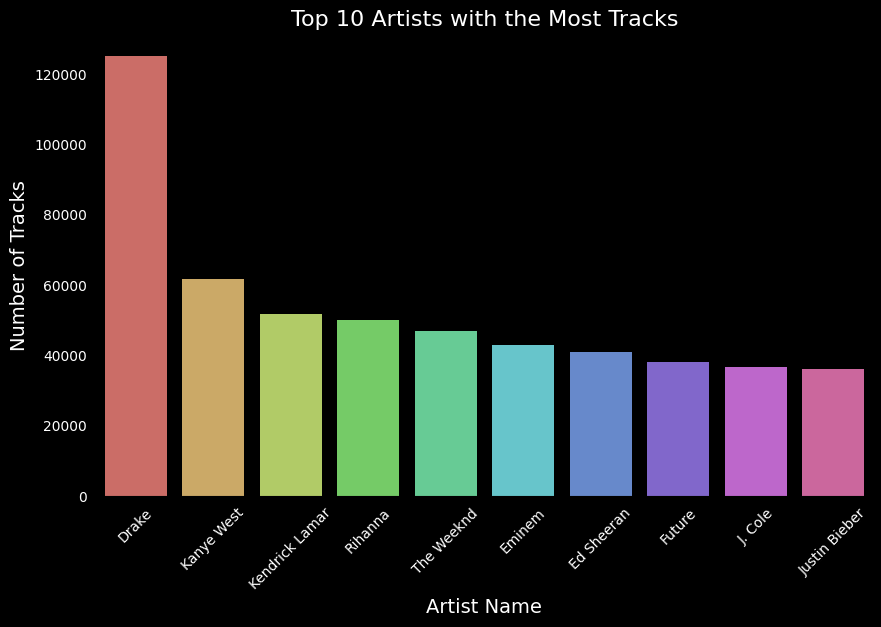

In [17]:
# A bar plot showing the number of tracks by each artist in the playlist.
plt.figure(figsize=(10,6))

# Sort the artists by the number of tracks in descending order

top_artists = df.groupby('artist_name')['track_name'].count().sort_values(ascending=False).head(10)

sns.barplot(x=top_artists.index, y=top_artists.values,hue=top_artists.index, palette=sns.color_palette("hls", 10), legend=False)

plt.title('Top 10 Artists with the Most Tracks', fontsize=16,color='white')

plt.xlabel('Artist Name', fontsize=14, color='white')

plt.ylabel('Number of Tracks', fontsize=14, color='white')

plt.xticks(rotation=45, color='white')

plt.yticks(color='white')

plt.gca().set_facecolor('#000000')
plt.gcf().set_facecolor('#000000')

plt.grid(True, linestyle='', alpha=0.25, color='white')

plt.show()

In [21]:
# top 5 duration_track

top_duration_tracks = df.groupby('duration_track').agg({'num_followers': 'sum'}).reset_index().head(10)

top_duration_tracks

,duration_track,num_followers
0,0.0,65196
1,1.0,356285
2,2.0,3262452
3,3.0,15199698
4,4.0,8491583
5,5.0,2334632
6,6.0,630176
7,7.0,300215
8,8.0,179764
9,9.0,74754


duration_track    float64
num_followers       int64
dtype: object


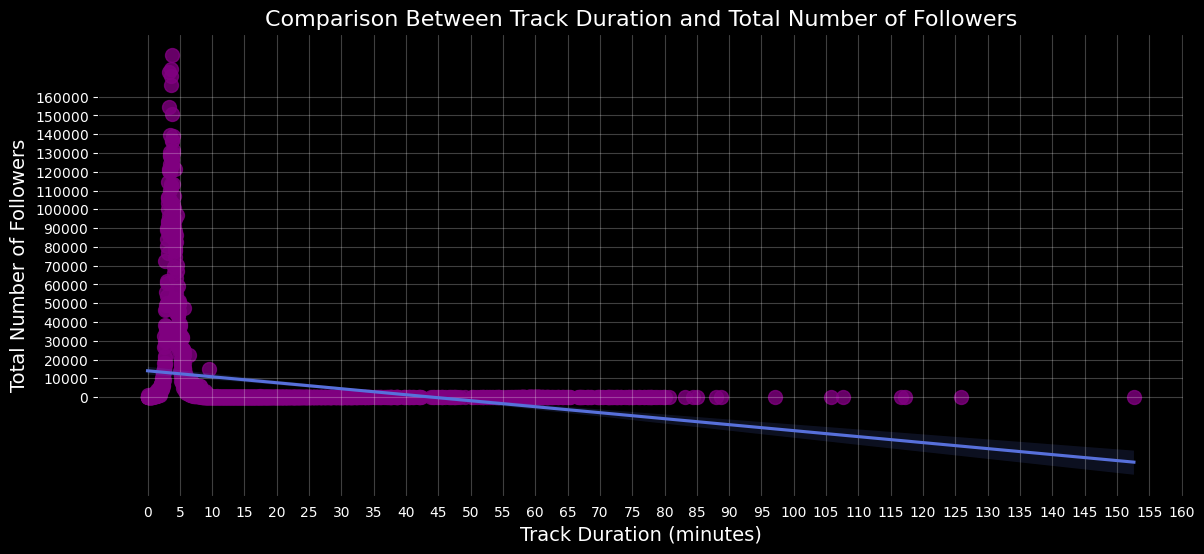

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Ensure 'duration_track' is correctly converted from '0:03:46' format to minutes
df['duration_track'] = df['duration_track'].apply(
    lambda x: pd.to_timedelta(x).total_seconds() / 60 if isinstance(x, str) else x
)

# Convert 'num_followers' to numeric in case it's not
df['num_followers'] = pd.to_numeric(df['num_followers'], errors='coerce')

# Drop any rows with missing or non-numeric values
df.dropna(subset=['duration_track', 'num_followers'], inplace=True)

# Check the data types to ensure correctness
print(df[['duration_track', 'num_followers']].dtypes)

# Group by 'duration_track' and calculate the total number of followers
track_data = df.groupby('duration_track').agg({'num_followers': 'sum'}).reset_index()

# Set up the figure dimensions
fig, ax = plt.subplots(figsize=(14, 6))

# Scatter plot of the relationship between track duration and the total number of followers
sns.regplot(data=track_data, x='duration_track', y='num_followers', 
            scatter_kws={'s': 100, 'color': 'purple'}, 
            line_kws={'color': '#5770db'}, ax=ax)

# Set labels and title
ax.set_xlabel('Track Duration (minutes)', fontsize=14, color='white')
ax.set_ylabel('Total Number of Followers', fontsize=14, color='white')
ax.set_title('Comparison Between Track Duration and Total Number of Followers', fontsize=16, color='white')

# Customize the plot appearance
ax.set_facecolor('#000000')
fig.patch.set_facecolor('#000000')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='solid', alpha=0.25, color='white')

# Set x-axis ticks to include 0, 5, 10, 15, ..., 160
ax.set_xticks(range(0, 165, 5))
ax.set_yticks(range(0, 160001, 10000))

# Use scientific notation for the y-axis if needed
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=True))

# Set the color of y-axis numbers to white
ax.tick_params(axis='y', colors='white')

# Display the plot
plt.show()


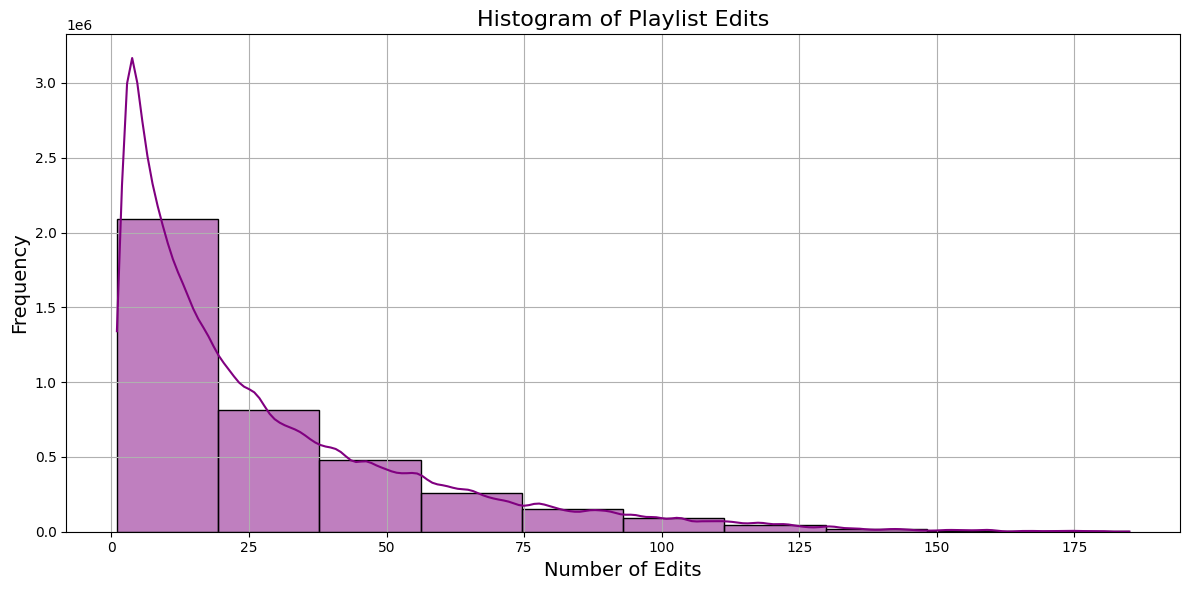

In [13]:
# Ensure the 'modified_at' column is of datetime type
df['modified_at'] = pd.to_datetime(df['modified_at'])

# Extract the year from the modified_at column
df['year'] = df['modified_at'].dt.year

# Group by year and sum the number of edits
edits_per_year = df.groupby('year').agg({'num_edits': 'sum'}).reset_index()

# Set up the figure dimensions
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(df['num_edits'], bins=10, color='purple', kde=True)

# Set labels and title
plt.xlabel('Number of Edits', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Playlist Edits', fontsize=16)

# Customize the appearance
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

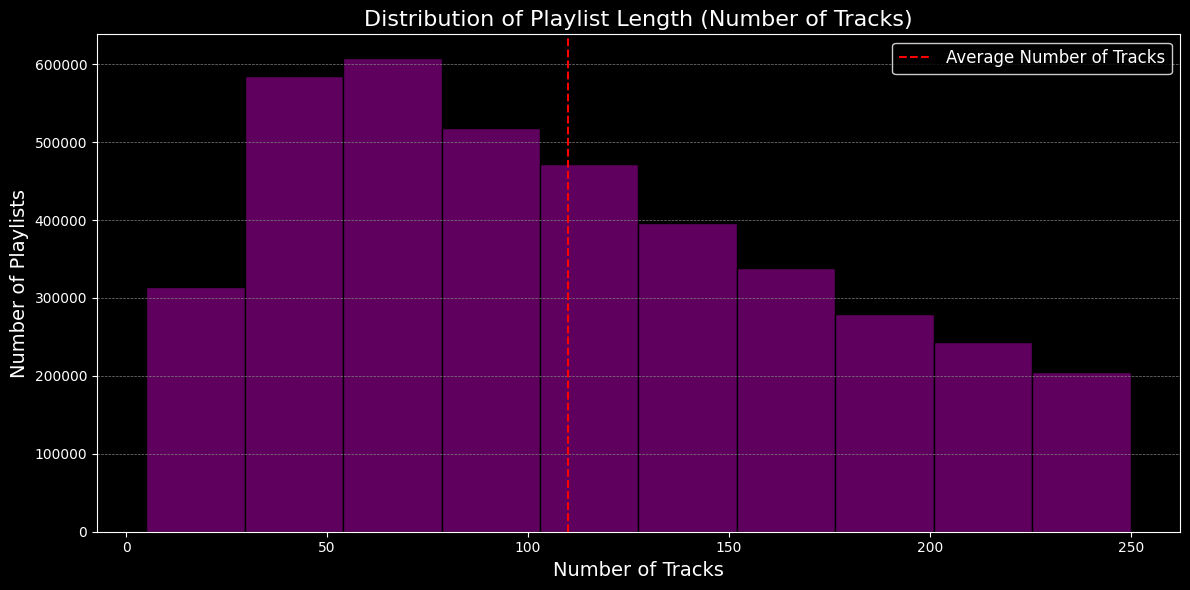

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average number of tracks
average_tracks = df['num_tracks'].mean()

# Set up the figure dimensions
plt.figure(figsize=(12, 6))

# Set the overall theme to black background with white text
plt.rcParams.update({
    "axes.facecolor": "black",
    "figure.facecolor": "black",
    "axes.edgecolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white",
    "axes.labelcolor": "white",
    "grid.color": "gray"
})

# Create the histogram with white labels
sns.histplot(df['num_tracks'], bins=10, color='purple', kde=False)

# Overlay the average number of tracks with a vertical line
plt.axvline(average_tracks, color='red', linestyle='--', label='Average Number of Tracks')

# Set labels and title with white text
plt.xlabel('Number of Tracks', fontsize=14, color='white')
plt.ylabel('Number of Playlists', fontsize=14, color='white')
plt.title('Distribution of Playlist Length (Number of Tracks)', fontsize=16, color='white')

# Customize the legend with white text
plt.legend(facecolor='black', edgecolor='white', labelcolor='white', fontsize=12)

# Customize the appearance
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)  # Make grid lines gray for better visibility
plt.tight_layout()

# Show the plot
plt.show()


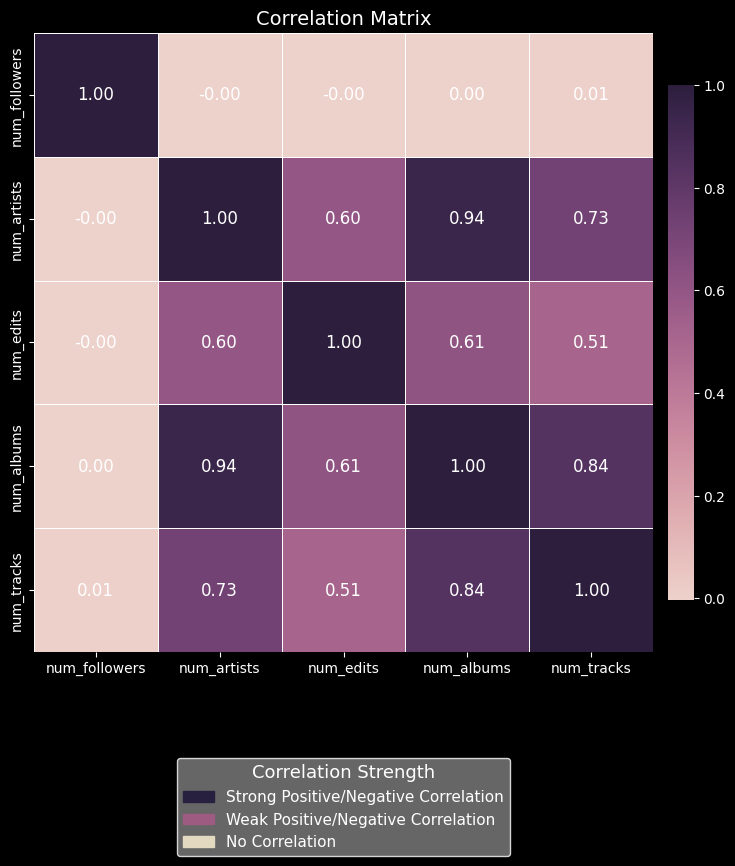

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# Data Preparation
data = pd.DataFrame()

# Add columns to the DataFrame
data['num_followers'] = df['num_followers']
data['num_artists'] = df['num_artists']
data['num_edits'] = df['num_edits']
data['num_albums'] = df['num_albums']
data['num_tracks'] = df['num_tracks']

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the figure dimensions (smaller size)
plt.figure(figsize=(8, 8))  # Reduced figure size to make the plot smaller

# Set the overall theme to black background with white text
plt.rcParams.update({
    "axes.facecolor": "black",
    "figure.facecolor": "black",
    "axes.edgecolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white",
    "axes.labelcolor": "white"
})

plt.gca().set_facecolor('#000000')
plt.gcf().set_facecolor('#000000')

# Plot the heatmap with a larger font size for annotations and title
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=sns.cubehelix_palette(as_cmap=True),
    square=True, 
    cbar_kws={"shrink": .8, "orientation": "vertical", "aspect": 20, "pad": 0.02},
    linewidths=.5, 
    linecolor='white', 
    annot_kws={"color": "white", "fontsize": 12}  # Increase annotation font size
)

# Set the title with increased font size
plt.title('Correlation Matrix', fontsize=14, color='white')

# Create a custom legend
legend_labels = [
    mpatches.Patch(color='#27213f', label="Strong Positive/Negative Correlation"),
    mpatches.Patch(color='#9d5b81', label="Weak Positive/Negative Correlation"),
    mpatches.Patch(color='#e3d9c1', label="No Correlation")
]

# Position the legend on the bottom of the heatmap
plt.legend(
    handles=legend_labels, 
    bbox_to_anchor=(0.5, -0.25), 
    loc='center', 
    fontsize=11,  # Adjusted for better visibility
    ncol=1, 
    frameon=True, 
    facecolor='gray', 
    edgecolor='white', 
    labelcolor='white', 
    title="Correlation Strength", 
    title_fontsize=13
)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [43]:
sns.color_palette("ch:s=-.2,r=.6", 5)
# code for each color
print(sns.color_palette("ch:s=-.2,r=.6",8).as_hex())

['#e3d9c1', '#d8b9a4', '#cc9692', '#b97688', '#9d5b81', '#774476', '#4f3261', '#27213f']


In [42]:
sns.color_palette("ch:s=-.2,r=.6", 9)

[(0.8892638312853967, 0.8490264305563623, 0.7570511784894085),
 (0.8534794271500803, 0.7401922344263069, 0.6540787267921894),
 (0.8145780826463438, 0.6202602053730479, 0.5834813561500798),
 (0.7597467941116649, 0.509078798168455, 0.5450447291503429),
 (0.6779472567428826, 0.4089021118923688, 0.5211323732841375),
 (0.56213346598662, 0.3202119023210633, 0.49272596011185305),
 (0.4296736738856285, 0.25020079696041003, 0.44518010073732817),
 (0.2836483394863876, 0.1870820104161683, 0.3620123819364522),
 (0.1544379249156812, 0.12779632898103252, 0.2480769565915658)]

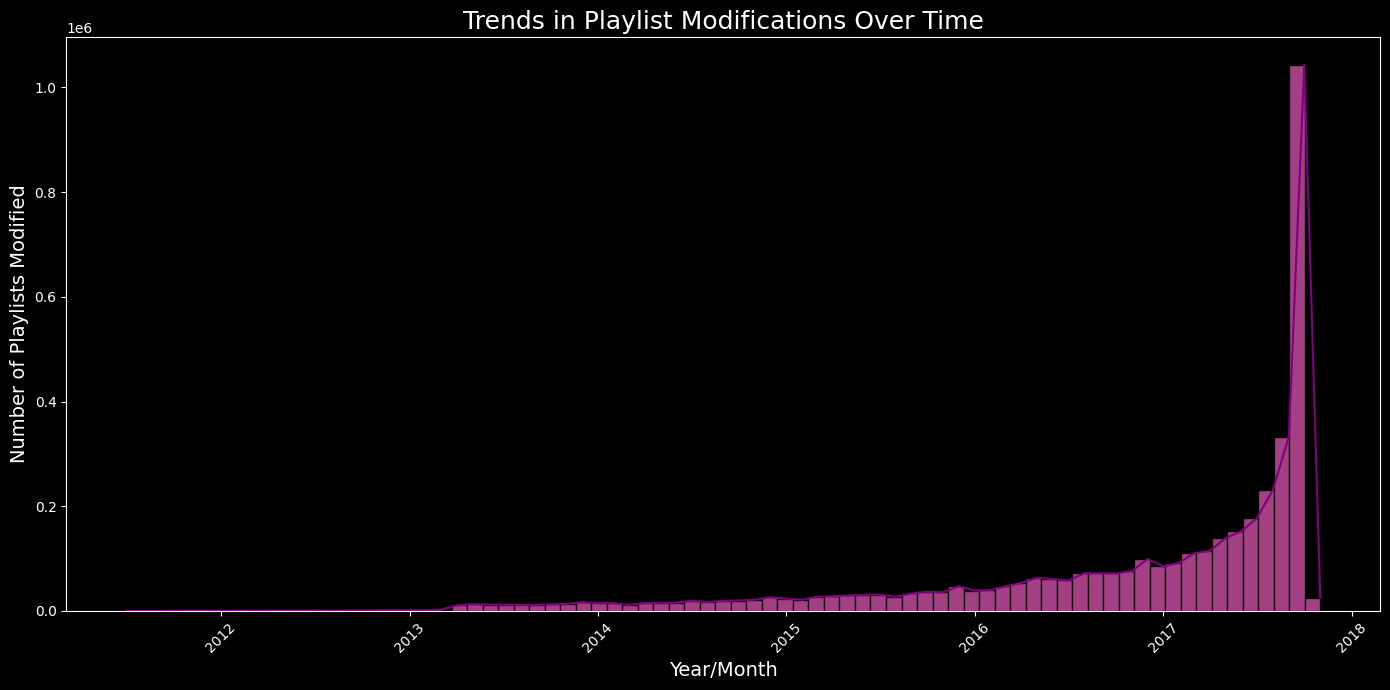

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'modified_at' column is in datetime format
df['modified_at'] = pd.to_datetime(df['modified_at'])

# Group by year and month, and count the number of playlists modified in each period
df['year_month'] = df['modified_at'].dt.to_period('M')
modifications_over_time = df.groupby('year_month').size()

# Reset the index to make it easier to plot
modifications_over_time = modifications_over_time.reset_index(name='num_modified')

# Convert 'year_month' back to datetime for proper plotting
modifications_over_time['year_month'] = modifications_over_time['year_month'].dt.to_timestamp()

# Set up the figure size and style
plt.figure(figsize=(14, 7))
plt.xticks(rotation=40, color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('#000000')
plt.gcf().set_facecolor('#000000')


# Plot the data
sns.lineplot(x='year_month', y='num_modified', data=modifications_over_time, color='purple')
# Plot the data as a histogram
sns.histplot(modifications_over_time, x='year_month', weights='num_modified', bins=len(modifications_over_time),
             color='#db57b2', kde=False)

# Set plot title and labels
plt.title('Trends in Playlist Modifications Over Time', fontsize=18,color='white')
plt.xlabel('Year/Month', fontsize=14,color='white')
plt.ylabel('Number of Playlists Modified', fontsize=14,color='white')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [6]:
data = pd.DataFrame()
data.head()
first_rows = df.groupby('pid').first().reset_index()

data = first_rows[['pid', 'num_followers', 'num_edits']]

In [7]:
data.head()

,pid,num_followers,num_edits
0,0,1,6
1,1,1,5
2,2,1,18
3,3,1,4
4,4,2,7


In [10]:
top_10_playlists.head()

,pid,num_followers,num_edits
7215,7215,15842,2
25495,25495,14812,8
48199,48201,6568,5
52245,52247,5282,31
54487,54489,4097,8


In [12]:
first_rows = df.groupby('playlist_name').first().reset_index()

top_10_playlists = first_rows[['playlist_name', 'num_followers', 'num_edits']].sort_values(by='num_followers', ascending=False).head(10)
top_10_playlists.head(10)

,playlist_name,num_followers,num_edits
12395,TOP POP,15842,2
9850,Pop Country,4097,8
19010,raggaeton,2994,22
9005,Now Playing,2699,14
16158,feels...,1303,39
1006,AWOLNATION,1038,98
12477,Tangled,1038,15
10002,Psychedelic Rock,586,4
1116,Alabama Shakes,508,18
19356,sad chill,448,2


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


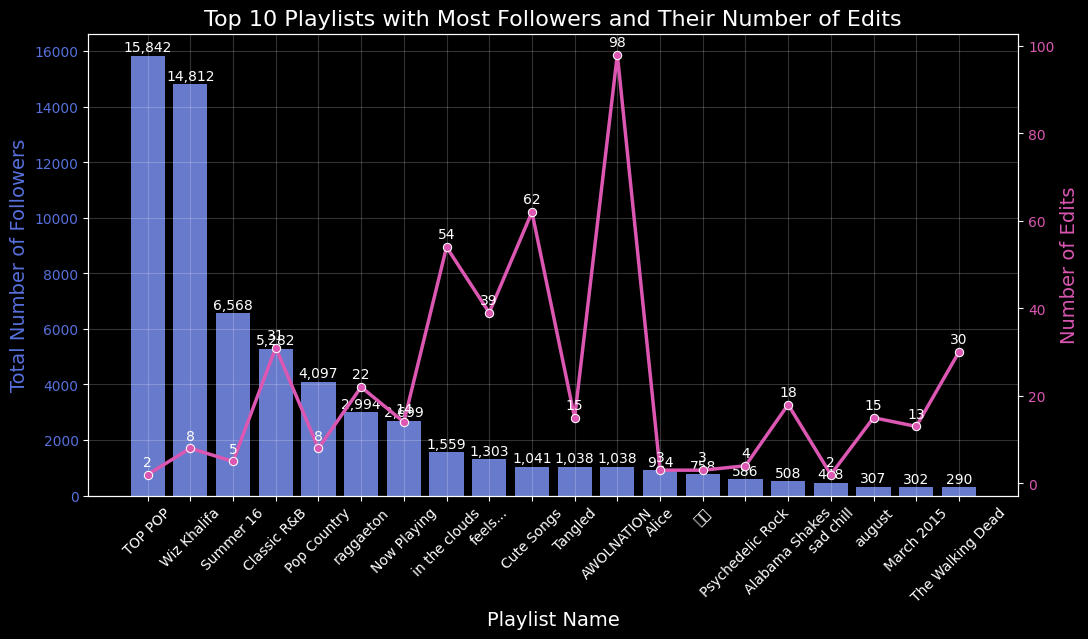

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation
top_10_playlists = (
    df.groupby('pid')
    .first()  # Take the first row for each unique 'pid'
    .reset_index()  # Reset index to convert 'pid' from index to column
    .sort_values(by='num_followers', ascending=False)  # Sort by followers in descending order
    .head(20)  # Get top 10 playlists
)

# Plot Setup
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of followers
sns.barplot(data=top_10_playlists, x='playlist_name', y='num_followers', color='#5770db', ax=ax1)
ax1.set_ylabel('Total Number of Followers', fontsize=14, color='#5770db')
ax1.tick_params(axis='y', labelcolor='#5770db')
ax1.set_xlabel('Playlist Name', fontsize=14, color='white')

# Line plot for number of edits
ax2 = ax1.twinx()
sns.lineplot(data=top_10_playlists, x='playlist_name', y='num_edits', marker='o', color='#db57b2', linewidth=2.5, ax=ax2)
ax2.set_ylabel('Number of Edits', fontsize=14, color='#db57b2')
ax2.tick_params(axis='y', labelcolor='#db57b2')

# Add annotations
for i in range(top_10_playlists.shape[0]):
    ax1.text(i, top_10_playlists['num_followers'].iloc[i] + 0.01 * top_10_playlists['num_followers'].max(), 
             f"{top_10_playlists['num_followers'].iloc[i]:,}", 
             horizontalalignment='center', fontsize=10, color='white')
    ax2.text(i, top_10_playlists['num_edits'].iloc[i] + 0.02 * top_10_playlists['num_edits'].max(), 
             f"{top_10_playlists['num_edits'].iloc[i]:,}", 
             horizontalalignment='center', fontsize=10, color='white')

# Plot Customization
plt.title('Top 10 Playlists with Most Followers and Their Number of Edits', fontsize=16, color='white')
ax1.set_facecolor('#000000')
fig.patch.set_facecolor('#000000')
ax1.grid(True, linestyle='solid', alpha=0.2, color='white')

# Setting x-ticks to playlist names
ax1.set_xticks(range(len(top_10_playlists['playlist_name'])))
ax1.set_xticklabels(top_10_playlists['playlist_name'], rotation=45, color='white')

plt.xticks(rotation=45, color='white')  # Ensure x-tick labels are readable
plt.show()


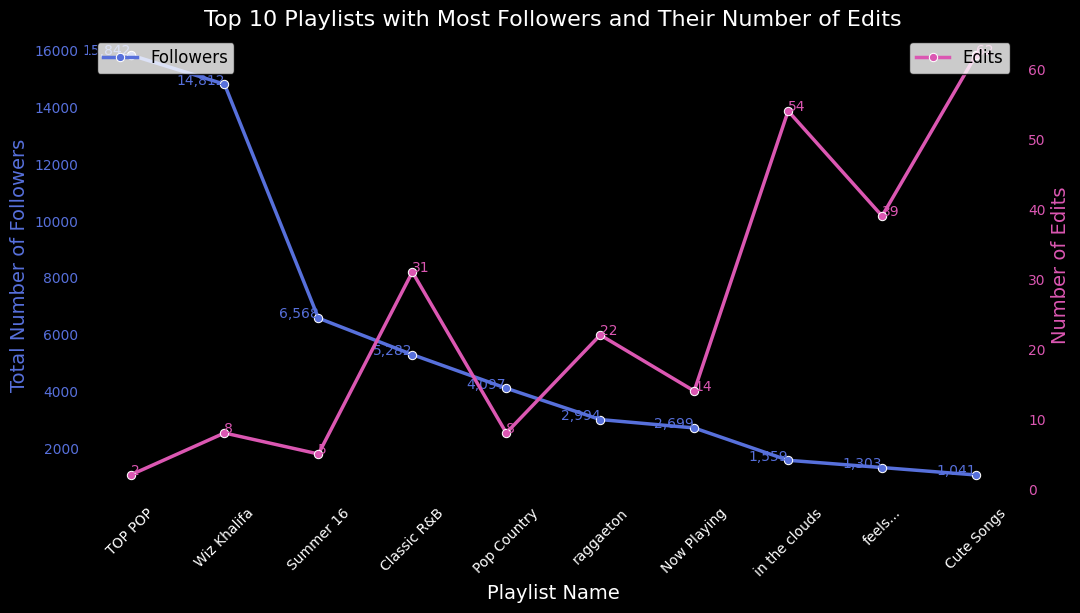

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Data Preparation
top_10_playlists = (
    df.groupby('pid')
    .first()  # Take the first row for each unique 'pid'
    .reset_index()  # Reset index to convert 'pid' from index to column
    .sort_values(by='num_followers', ascending=False)  # Sort by followers in descending order
    .head(10)  # Get top 10 playlists
)

# Plot Setup
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot for number of followers
sns.lineplot(data=top_10_playlists, x='playlist_name', y='num_followers', marker='o', color='#5770db', linewidth=2.5, ax=ax1, label='Followers')
ax1.set_ylabel('Total Number of Followers', fontsize=14, color='#5770db')
ax1.tick_params(axis='y', labelcolor='#5770db')
ax1.set_xlabel('Playlist Name', fontsize=14, color='white')

# Secondary y-axis for number of edits
ax2 = ax1.twinx()
sns.lineplot(data=top_10_playlists, x='playlist_name', y='num_edits', marker='o', color='#db57b2', linewidth=2.5, ax=ax2, label='Edits')
ax2.set_ylabel('Number of Edits', fontsize=14, color='#db57b2')
ax2.tick_params(axis='y', labelcolor='#db57b2')

# Add annotations
for i in range(top_10_playlists.shape[0]):
    ax1.text(i, top_10_playlists['num_followers'].iloc[i], 
             f"{top_10_playlists['num_followers'].iloc[i]:,}", 
             horizontalalignment="right", fontsize=10, color='#5770db')
    ax2.text(i, top_10_playlists['num_edits'].iloc[i], 
             f"{top_10_playlists['num_edits'].iloc[i]:,}", 
             horizontalalignment='left', fontsize=10, color='#db57b2')

# Plot Customization
plt.title('Top 10 Playlists with Most Followers and Their Number of Edits', fontsize=16, color='white')
ax1.set_facecolor('#000000')
fig.patch.set_facecolor('#000000')

# Setting x-ticks to playlist names
ax1.set_xticks(range(len(top_10_playlists['playlist_name'])))
ax1.set_xticklabels(top_10_playlists['playlist_name'], rotation=45, color='white')

# Adding legends
ax1.legend(loc='upper left', fontsize=12, facecolor='white', edgecolor='black')
ax2.legend(loc='upper right', fontsize=12, facecolor='white', edgecolor='black')

plt.show()


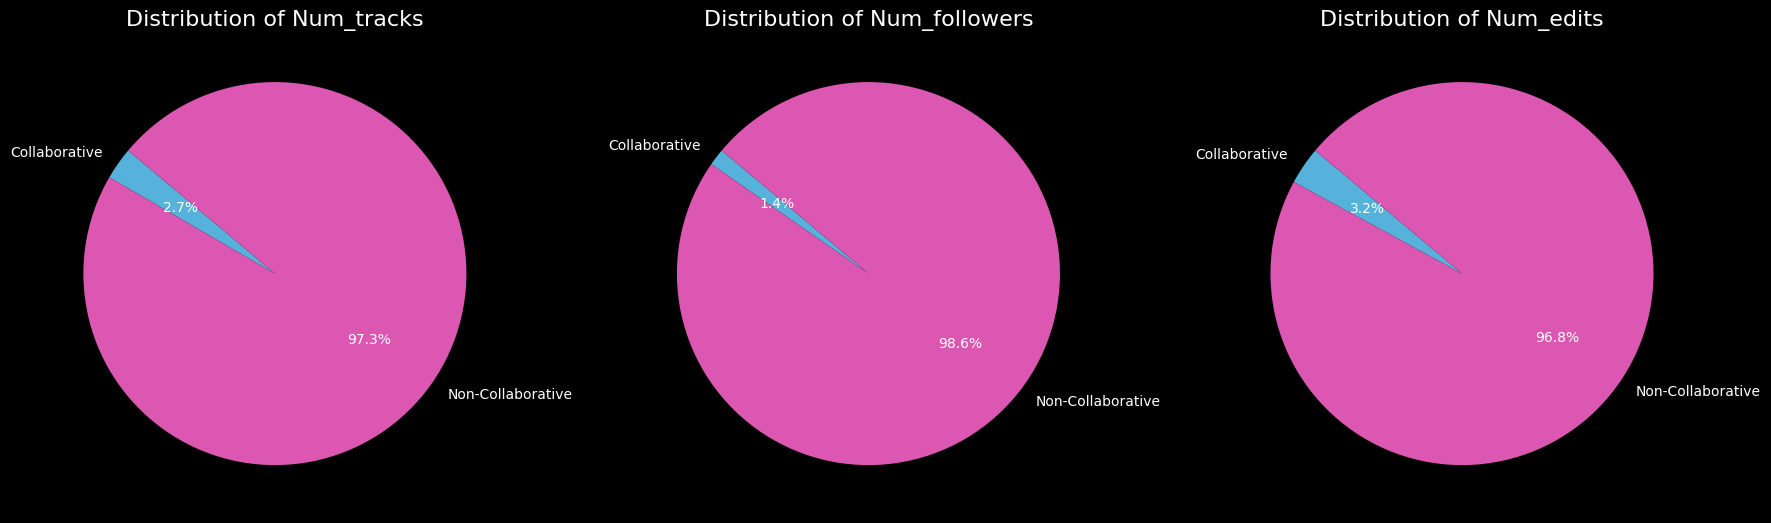

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Proportions for each characteristic
characteristics = ['num_tracks', 'num_followers', 'num_edits']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, var in enumerate(characteristics):
    # Compute proportions
    df_collab = df[df['collaborative'] == 'True'][var].sum()
    df_non_collab = df[df['collaborative'] == 'False'][var].sum()
    total = df[var].sum()
    
    sizes = [df_collab, df_non_collab]
    labels = ['Collaborative', 'Non-Collaborative']
    
    # Pie Chart
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#57b2db', '#db57b2'], textprops={'color': 'white'})
    axs[i].set_title(f'Distribution of {var.capitalize()}', fontsize=16,color='white')


# Set background color to black
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')
# Adjust layout
plt.tight_layout()
plt.show()


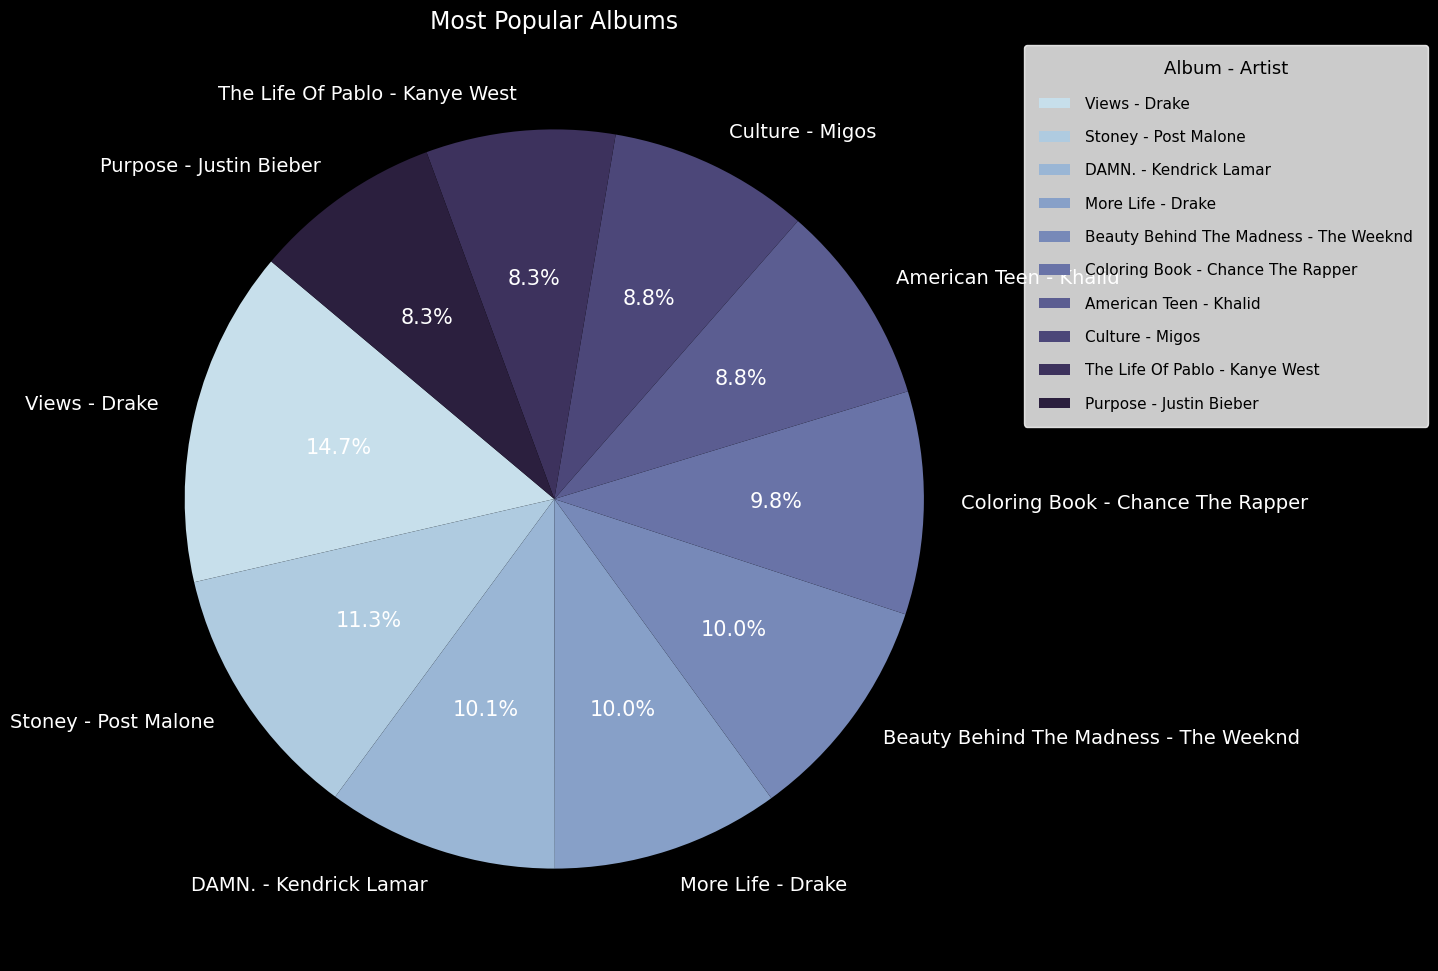

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation
if not df.empty:
    # Extract top 10 albums with their corresponding artist names
    top_albums = df.groupby(['album_name', 'artist_name']).size().reset_index(name='count')
    top_albums = top_albums.sort_values('count', ascending=False).head(10)

    # Prepare data for pie chart
    sizes = top_albums['count']
    labels = top_albums['album_name'] + " - " + top_albums['artist_name']

    # Define color palette
    colors = sns.color_palette("ch:s=.25,rot=-.25", 10).as_hex()

    # Pie Chart
    fig, ax = plt.subplots(figsize=(12, 12))  # Smaller figure size
    wedges, texts, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,
        textprops={'fontsize': 10, 'color': 'white'}  # Adjust label font size and color
    )

    # Customizing the plot background
    fig.patch.set_facecolor('black')  # Set figure background color
    ax.set_facecolor('black')  # Set axes background color

    # Customize text color and font size in the pie chart
    for text in texts:
        text.set_color('white')
        text.set_fontsize(14)  # Increase the font size for better visibility
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(15)  # Make percentage text larger

    # Add a legend with improved visibility
    ax.legend(
        wedges, labels, 
        title="Album - Artist", 
        loc="upper left", 
        bbox_to_anchor=(1, 0, 0.5, 1),
        frameon=True, 
        facecolor='white', 
        edgecolor='white', 
        fontsize=11,  # Larger legend font size
        title_fontsize='13', 
        labelspacing=1.2, 
        borderpad=1, 
        handletextpad=1
    )

    # Set title
    ax.set_title('Most Popular Albums', fontsize=17, color='white')

    plt.show()
else:
    print("The DataFrame is empty. Please provide a valid DataFrame.")


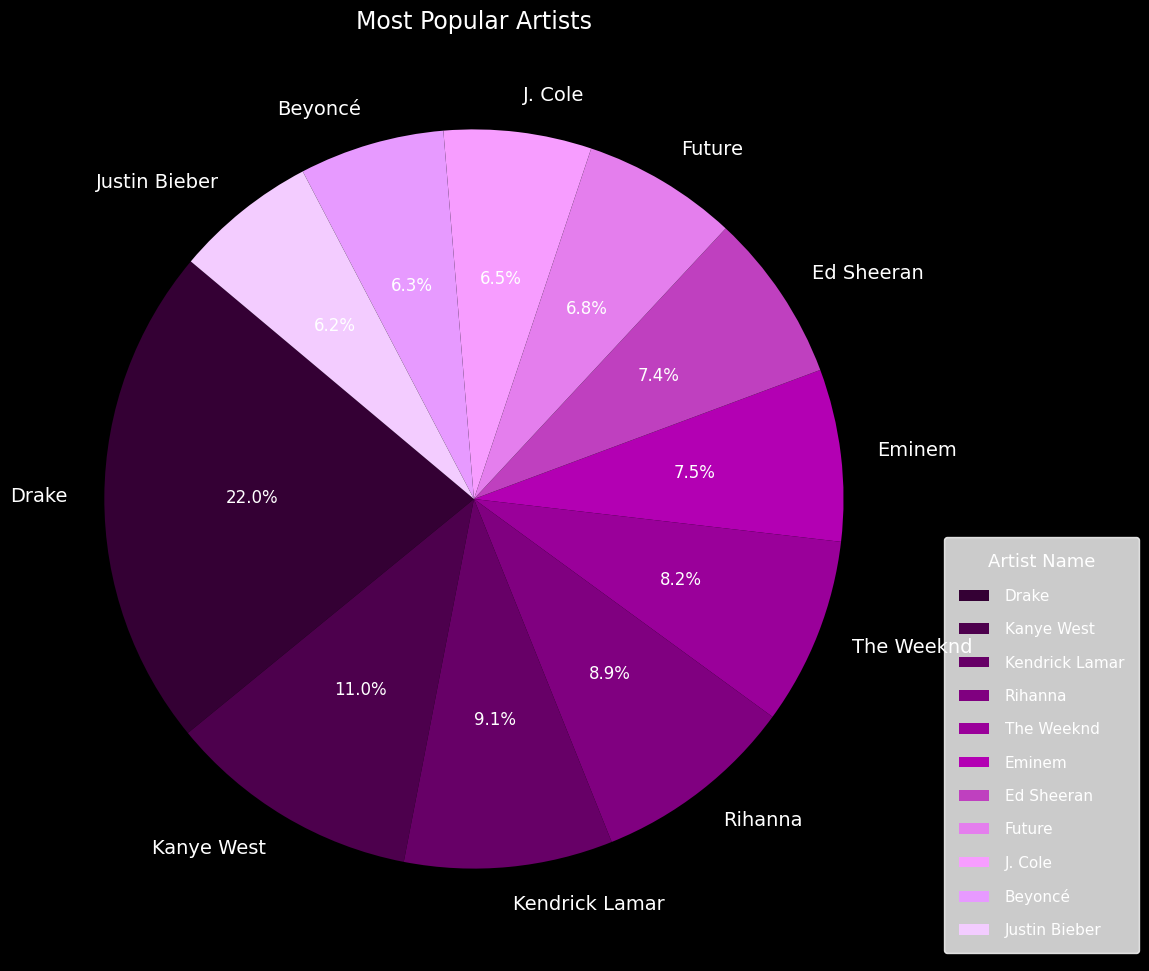

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation
if not df.empty:
    # Sort the artists by the number of tracks in descending order
    top_artists = df.groupby('artist_name')['track_name'].count().sort_values(ascending=False).head(11)

    # Extract sizes and labels for the pie chart
    sizes = top_artists.values
    labels = top_artists.index

    # Define color palette
    colors = ['#340034', '#4d004d', '#670067', '#800080', '#9a009a', '#b300b3', '#BF40BF', '#e47eed','#f79dff', '#e79aff', '#f3ccff']

    # Pie Chart
    fig, ax = plt.subplots(figsize=(12, 12))  # Reduced figure size for a smaller pie chart
    wedges, texts, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        textprops={'fontsize': 11, 'color': 'white'}  # Adjust label font size and color
    )

    # Customizing the plot background
    fig.patch.set_facecolor('black')  # Set figure background color
    ax.set_facecolor('black')  # Set axes background color

    # Customize text color and increase font size in the pie chart
    for text in texts:
        text.set_color('white')
        text.set_fontsize(14)  # Increase label font size for better readability
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)  # Increase percentage text font size

    # Add a legend with improved visibility
    ax.legend(
        wedges, labels, 
        title="Artist Name", 
        loc="lower left", 
        bbox_to_anchor=(1, 0, 0.5, 1),
        frameon=True, 
        facecolor='white', 
        edgecolor='white', 
        fontsize=11,  # Larger legend font size for clarity
        title_fontsize='13', 
        labelspacing=1.2, 
        borderpad=1, 
        handletextpad=1
    )

    # Set title
    ax.set_title('Most Popular Artists', fontsize=17, color='white')

    plt.show()
else:
    print("The DataFrame is empty. Please provide a valid DataFrame.")
